****CLUSTERING****
Se elaboró una notebook para realizar *word clustering*, seleccionando el texto de "cien años de soledad" de *Gabriel García Marquez*


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import pickle
import nltk
import os
import sklearn.manifold
from collections import Counter
from nltk.cluster import kmeans, cosine_distance

In [3]:
cien = "cien.txt"
text_file = open(cien, "r")
dataset = text_file.read()
text_file.close()

In [4]:
nlp = spacy.load('es_core_news_sm', vectors=False, entity=False)
doc = nlp(dataset)

**Se inicia con el preprocesamiento del corpus.**

**Como se trabajó con un texto literario que no contiene signos/caracteres especiales tales como '%', '#', '&', etc, no fue necesaria su eliminación.**


**En cuanto a los signos de puntuación ',', '.', '¿?', etc, se decidió dejarlos en este paso para la correcta distinción de oraciones, pero será necesaria su eliminación para la matriz de coocurrencia más adelante.**


**Se trabajó con la librería** *SpaCy* **que nos provee tokenización y detección de stopwords automáticamente, no implementandolo por separado.**


**Parsing del corpus**


Para el parseo del corpus se utilizó la librería *SpaCy*, donde primero se cargó el modelo de español y luego se le proveyó el corpus preprocesado. Esto nos provee un objeto tipo Doc, el cual posee todo el corpus tokenizado, junto a su información sintáctica y semántica que el mismo puede proveer. A partir de esta información, se procedió a armar el diccionario de features de las palabras.




In [5]:
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)












Gabriel García Márquez

Cien años de soledad






 	I	

   Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de barba montaraz y manos de gorrión, que se presentó con el nombre de Melquiades, hizo una truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios













 SPACE 
Gabriel PROPN nsubj
García PROPN flat
Márquez PROPN flat


 SPACE 
Cien NUM nummod
años NOUN nmod
de ADP case
soledad NOUN nmod







 	 SPACE 
I CONJ flat
	

    SPACE 
Muchos DET det
años NOUN obl
después ADV advmod
, PUNCT punct
frente NOUN case
al ADP fixed
pelotón NOUN obl
de ADP case
fusilamiento NOUN nmod
, PUNCT punct
el DET det
coronel NOUN nsubj
Aureliano PROPN appos
Buendía PROPN flat
había AUX aux
de ADP mark
recordar VERB csubj
aquella DET det
tarde NOUN obj
remota ADJ ROOT
en ADP mark
que SCONJ mark
su DET det
padre NOUN nsubj
lo PRON obj
llevó VERB advcl
a ADP mark
conocer VERB xcomp
el DET det
hielo NOUN obj
. PUNCT punct
Macondo VERB nsubj
era AUX cop
entonces ADV advmod
una DET det
aldea NOUN ROOT
de ADP case
veinte NUM nummod
casas NOUN nmod
de ADP case
barro NOUN nmod
y CONJ cc
cañabrava VERB conj
construidas ADJ amod
a ADP case
la DET det
orilla NOUN obl
de ADP case
un DET det
río NOUN nmod
de ADP case
aguas NOUN nmod
diáfanas ADJ amod
que PRON

dio VERB conj
entonces ADV advmod
una DET det
prueba NOUN obj
convincente ADJ amod
de ADP case
honradez NOUN nmod
: PUNCT punct
le PRON obj
devolvió VERB advcl
los DET det
doblones NOUN obj
a ADP case
cambio NOUN fixed
de ADP fixed
la DET det
lupa NOUN obl
, PUNCT punct
y CONJ cc
le PRON obj
dejó VERB conj
además ADV advmod
unos DET det
mapas NOUN obj
portugueses ADJ amod
y CONJ cc
varios DET det
instrumentos NOUN conj
de ADP case
navegación NOUN nmod
. PUNCT punct
De ADP case
su DET det
puño NOUN obl
y CONJ cc
letra NOUN conj
escribió VERB ROOT
una DET det
apretada ADJ amod
síntesis NOUN obj
de ADP case
los DET det
estudios NOUN nmod
del ADP case
monje NOUN amod
Hermann PROPN nmod
, PUNCT punct
que PRON nsubj
dejó VERB acl
a ADP case
su DET det
disposición NOUN obj
para ADP mark
que SCONJ mark
pudiera AUX aux
servirse VERB advcl
del ADP case
astrolabio NOUN obl
, PUNCT punct
la DET det
brújula NOUN obj
y CONJ cc
el DET det
sextante NOUN conj
. PUNCT punct
José PROPN nsubj
Arcadio PROP

en ADP case
su DET det
memoria NOUN obl
, PUNCT punct
vinculado ADJ amod
al ADP case
recuerdo NOUN obj
de ADP case
Melquíades PROPN nmod
. PUNCT punct

    SPACE 
El DET det
rudimentario NOUN nsubj
laboratorio ADJ amod
-sin AUX punct
contar VERB csubj
una DET det
profusión NOUN obj
de ADP case
cazuelas NOUN nmod
, PUNCT punct
embudos ADJ amod
, PUNCT punct
retortas NOUN conj
, PUNCT punct
filtros NOUN conj
y CONJ cc
coladores- VERB conj
estaba AUX cop
compuesto ADJ ROOT
por ADP case
un DET det
atanor NOUN obj
primitivo ADJ amod
; PUNCT punct
una DET det
probeta NOUN nsubj
de ADP case
cristal NOUN nmod
de ADP case
cuello NOUN nmod
largo ADJ amod
y CONJ cc
angosto ADJ conj
, PUNCT punct
imitación NOUN appos
del ADP case
huevo NOUN nmod
filosófico ADJ amod
, PUNCT punct
y CONJ cc
un DET det
destilador NOUN conj
construido ADJ amod
por ADP case
los DET det
propios DET det
gitanos NOUN obj
según ADP case
las DET det
descripciones NOUN obl
modernas ADJ amod
del ADP case
alambique NOUN nmod
d

. PUNCT punct
De ADP case
acuerdo NOUN fixed
con ADP fixed
los DET det
cálculos NOUN obl
de ADP case
José PROPN nmod
Arcadio PROPN flat
Buendía PROPN flat
, PUNCT punct
la DET det
única ADJ amod
posibilidad NOUN nsubj
de ADP case
contacto NOUN nmod
con ADP case
la DET det
civilización NOUN nmod
era AUX cop
la DET det
ruta NOUN ROOT
del ADP case
Norte PROPN nmod
. PUNCT punct
De ADP mark
modo NOUN fixed
que SCONJ fixed
dotó VERB ROOT
de ADP case
herramientas NOUN obj
de ADP case
desmonte ADV advmod
y CONJ cc
armas NOUN conj
de ADP case
cacería NOUN nmod
a ADP case
los DET det
mismos DET det
hombres NOUN obj
que PRON nsubj
lo PRON obj
acompañaron VERB acl
en ADP case
la DET det
fundación NOUN obl
de ADP case
Macondo PROPN nmod
; PUNCT punct
echó VERB advcl
en ADP case
una DET det
mochila NOUN obl
sus DET det
instrumentos NOUN obj
de ADP case
orientación NOUN nmod
y CONJ cc
sus DET det
mapas NOUN conj
, PUNCT punct
y CONJ cc
emprendió VERB conj
la DET det
temeraria ADJ amod
aventura NOUN 

mano NOUN obl
en ADP case
el DET det
aire NOUN nmod
y CONJ cc
los DET det
ojos NOUN conj
inmóviles ADJ amod
, PUNCT punct
oyendo VERB aux
a ADP case
la DET det
distancia NOUN obj
los DET det
pífanos NOUN obj
y CONJ cc
tambores NOUN conj
y CONJ cc
sonajas NOUN conj
de ADP case
los DET det
gitanos NOUN nmod






 SPACE 
que PRON nsubj
una DET det
vez NOUN obl
más ADV advmod
llegaban VERB advcl
a ADP case
la DET det
aldea NOUN obl
, PUNCT punct
pregonando VERB advcl
el DET det
último ADJ amod
y CONJ cc
asombroso ADJ conj
descubrimiento NOUN obj
de ADP case
los DET det
sabios NOUN nmod
de ADP case
Memphis PROPN nmod
. PUNCT punct

    SPACE 
Eran AUX cop
gitanos NOUN ROOT
nuevos ADJ amod
. PUNCT punct
Hombres NOUN ROOT
y CONJ cc
mujeres NOUN conj
jóvenes ADJ amod
que PRON nsubj
sólo ADV advmod
conocían VERB acl
su DET det
propia DET det
lengua NOUN obj
, PUNCT punct
ejemplares NOUN appos
hermosos ADJ amod
de ADP case
piel NOUN nmod
aceitada ADJ amod
y CONJ cc
manos NOUN conj
inteligentes 

apartó VERB ROOT
de ADP case
José PROPN obl
Arcadio PROPN flat
Buendía PROPN flat
para ADP mark
que SCONJ mark
toda DET det
la DET det
gallera NOUN nsubj
pudiera AUX aux
oír VERB advcl
lo DET det
que PRON nsubj
iba AUX aux
a ADP case
decirle NOUN ccomp
. PUNCT punct

 SPACE 
-Te ADJ ROOT
felicito NOUN amod
-gritó- ADJ appos
. PUNCT punct
A ADP mark
ver AUX aux
si SCONJ mark
por ADP advmod
fin NOUN fixed
ese DET det
gallo NOUN nsubj
le PRON obj
hace VERB ROOT
el DET det
favor NOUN obl
a ADP case
tu DET det
mujer NOUN obj
. PUNCT punct

    SPACE 
José PROPN nsubj
Arcadio PROPN flat
Buendía PROPN flat
, PUNCT punct
sereno NOUN amod
, PUNCT punct
recogió VERB ROOT
su DET det
gallo NOUN obj
. PUNCT punct
« SCONJ punct
Vuelvo VERB ccomp
en ADP case
seguida ADJ amod
» NOUN punct
, PUNCT punct
dijo VERB ROOT
a ADP case
todos PRON obj
. PUNCT punct
Y CONJ advmod
luego ADV advmod
, PUNCT punct
a ADP case
Prudencio PROPN obl
Aguilar PROPN flat
: PUNCT punct

 SPACE 
-Y NOUN nummod
tú PRON nmod
,

en ADP case
el DET det
dormitorio NOUN obl
con ADP case
el DET det
pretexto NOUN obl
de ADP case
enseñarle VERB nmod
un DET det
truco NOUN obj
de ADP case
barajas NOUN nmod
. PUNCT punct
Entonces ADV advmod
lo PRON obj
tocó VERB ROOT
con ADP case
tanta DET det
libertad NOUN obl
que SCONJ obj
él PRON nsubj
sufrió VERB acl
una DET det
desilusión NOUN obj
después ADV advmod
del ADP case
estremecimiento NOUN obl






 SPACE 
inicial ADJ amod
, PUNCT punct
y CONJ cc
experimentó VERB conj
más ADV advmod
miedo NOUN obj
que PRON mark
placer VERB nmod
. PUNCT punct
Ella PRON nsubj
le PRON iobj
pidió VERB ROOT
que SCONJ mark
esa DET det
noche NOUN obl
fuera AUX cop
a ADP case
buscarla NOUN ccomp
. PUNCT punct
Él PRON nsubj
estuvo AUX cop
de ADP ROOT
acuerdo NOUN fixed
, PUNCT punct
por ADP mark
salir VERB advcl
del ADP case
paso NOUN obl
, PUNCT punct
sabiendo AUX aux
que SCONJ mark
no ADV advmod
seria VERB advcl
capaz ADJ obj
de ADP mark
ir VERB acl
. PUNCT punct
Pero CONJ advmod
esa DET det
n

rostro NOUN obl
de ADP case
Úrsula PROPN nmod
, PUNCT punct
confusamente ADV advmod
consciente ADJ amod
de ADP mark
que SCONJ mark
estaba AUX aux
haciendo VERB acl
algo PRON obj
que PRON nsubj
desde ADP case
hacía VERB aux
mucho DET det
tiempo NOUN obl
deseaba VERB acl
que SCONJ mark
se PRON obj
pudiera AUX aux
hacer VERB xcomp
, PUNCT punct
pero CONJ cc
que SCONJ nsubj
nunca ADV advmod
se PRON obj
había AUX aux
imaginado VERB conj
que SCONJ mark
en ADP advmod
realidad NOUN fixed
se PRON obj
pudiera AUX aux
hacer VERB xcomp
, PUNCT punct
sin ADP mark
saber AUX aux
cómo PRON obl
lo PRON obj
estaba AUX aux
haciendo VERB advcl
porque SCONJ mark
no ADV advmod
sabía VERB advcl
dónde PRON obl
es- VERB nsubj
taban VERB ccomp
los DET det
pies NOUN obj
v CONJ cc
dónde PRON punct
la DET det
cabeza NOUN nsubj
, PUNCT punct
ni CONJ cc
los DET det
pies NOUN conj
de ADP case
quién PRON nmod
ni CONJ cc
la DET det
cabeza NOUN conj
de ADP case
quién PRON nmod
, PUNCT punct
y CONJ cc
sintiendo AUX aux
q

Arcadio PROPN flat
y CONJ cc
la DET det
muchacha NOUN conj
no ADV advmod
presenciaron VERB ROOT
la DET det
decapitación NOUN obj
. PUNCT punct
Fueron AUX cop
a ADP case
la DET det
carpa NOUN ROOT
de ADP case
ella PRON nmod
, PUNCT punct
donde PRON obl
se PRON obj
besaron VERB acl
con ADP case
una DET det
ansiedad NOUN obj
desesperada ADJ amod
mientras SCONJ mark
se PRON obj
iban AUX aux
quitando VERB advcl
la DET det
ropa NOUN obj
. PUNCT punct
La DET det
gitana NOUN nsubj
se PRON obj
deshizo VERB ROOT
de ADP casepero CONJ cc
interpretándolos NOUN conj
como SCONJ mark
anuncios NOUN nmod
de ADP case
la DET det
materia NOUN nmod
. PUNCT punct
Un DET det
día NOUN obl
la DET det
canastilla NOUN nsubj
de ADP case
Amaranta PROPN nmod
empezó AUX aux
a ADP mark
moverse VERB ROOT
con ADP case
un DET det
impulso NOUN obl
propio ADJ amod
y CONJ cc
dio VERB conj
una DET det
vuelta NOUN obj
completa ADJ amod
en ADP case
el DET det
cuarto NOUN obl
, PUNCT punct
ante ADP case
la DET det
consternación

madre NOUN nmod
, PUNCT punct
porque SCONJ mark
Aureliano PROPN nsubj
tuvo VERB advcl
la DET det
paciencia NOUN obj
de ADP mark
leer VERB acl
frente NOUN case
a ADP case
ella PRON obl
todo DET det
el DET det
santoral NOUN obj
y CONJ cc
no ADV advmod
logró VERB conj
que SCONJ mark
reaccionara VERB ccomp
can VERB obj
ningún DET det
nombre NOUN obj
. PUNCT punct
Como SCONJ mark
en ADP case
aquel DET det
tiempo NOUN obl
no ADV advmod
había AUX aux
cementerio VERB ROOT
en ADP case
Macondo PROPN obl
, PUNCT punct
pues SCONJ mark
hasta ADP case
entonces ADV advmod
no ADV advmod
había AUX aux
muerta VERB advcl
nadie PRON obj
, PUNCT punct
conservaron VERB conj
la DET det
talega NOUN obj
con ADP case
los DET det
huesos NOUN obl
en ADP mark
espera NOUN fixed
de ADP fixed
que SCONJ mark
hubiera AUX advcl
un DET det
lugar NOUN obj
digno ADJ amod
para ADP case
sepultarías NOUN nmod
, PUNCT punct
y CONJ cc
durante ADP case
mucho DET det
tiempo NOUN obl
estorbaron VERB conj
por ADP case
todas DET det

porque SCONJ mark
el DET det
objeto NOUN nsubj
tenía VERB advcl
un DET det
nombre NOUN obj
difícil ADJ amod
de ADP mark
recordar VERB acl
. PUNCT punct
Pero CONJ advmod
pocos DET det
días NOUN obl
después ADV advmod
descubrió VERB ROOT
que SCONJ mark
tenía VERB ccomp
dificultades NOUN obj
para ADP mark
recordar VERB acl
casi ADV advmod
todas DET det
las DET det
cosas NOUN obj
del ADP case
laboratorio NOUN nmod
. PUNCT punct
Entonces ADV advmod
las PRON obj
marcó VERB ROOT
con ADP case
el DET det
nombre NOUN obl
respectivo ADJ amod
, PUNCT punct
de ADP mark
modo NOUN fixed
que PRON fixed
le PRON obj
bastaba VERB advcl
con ADP mark
leer VERB advcl
la DET det
inscripción NOUN obj
para ADP case
identificarlas NOUN nmod
. PUNCT punct
Cuando SCONJ mark
su DET det
padre NOUN nsubj
le PRON obj
comunicó VERB advcl
su DET det
alarma NOUN obj
por ADP mark
haber AUX aux
olvidado VERB advcl
hasta ADP case
los DET det
hechos NOUN obl
más ADV advmod
impresionantes ADJ amod
de ADP case
su DET det
niñe

llevaba VERB ROOT
de ADP case
pueblo NOUN obl
en ADP case
pueblo NOUN obl
, PUNCT punct
acostándola VERB advcl
por ADP case
veinte NUM nummod
centavos NOUN obl
, PUNCT punct
para ADP mark
pagarse VERB advcl
el DET det
valor NOUN obj
de ADP case
la DET det
casa NOUN nmod
incendiada ADJ amod
. PUNCT punct
Según ADP case
los DET det
cálculos NOUN obl
de ADP case
la DET det
muchacha NOUN nmod
, PUNCT punct
todavía ADV advmod
la PRON obj
faltaban VERB ROOT
unos PRON det
diez NUM nummod
años NOUN nsubj
de ADP case
setenta NUM nummod
hombres NOUN nmod
por ADP case
noche NOUN nmod
, PUNCT punct
porque SCONJ mark
tenía VERB advcl
que SCONJ cc
pagar VERB conj
además ADV advmod
los DET det
gastos NOUN obj
de ADP case
viaje NOUN nmod
y CONJ cc
alimentación NOUN conj
de ADP case
ambas NUM nummod
y CONJ cc
el DET det
sueldo NOUN conj
de ADP case
los DET det
indios NOUN nmod
que PRON obj
cargaban VERB acl
el DET det
mecedor NOUN nsubj
. PUNCT punct
Cuando SCONJ mark
la DET det
matrona NOUN nsubj
tocó

los DET det
espacios NOUN obj
pelados ADJ amod
que PRON nsubj
construyeron VERB acl
los DET det
albañiles NOUN nsubj
, PUNCT punct
José PROPN nsubj
Arcadio PROPN flat
Buendía PROPN flat
renunció VERB advcl
a ADP case
la DET det
persecución NOUN obj
de ADP case
la DET det
imagen NOUN nmod
de ADP case
Dios PROPN nmod
, PUNCT punct
convencido ADJ amod
de ADP case
su DET det
inexistencia NOUN obj
, PUNCT punct
y CONJ cc
destripó VERB conj
la DET det
pianola NOUN obj
para ADP mark
descifrar VERB advcl
su DET det
magia NOUN obj






 SPACE 
secreta ADJ amod
. PUNCT punct
Dos NUM nummod
días NOUN obl
antes ADV advmod
de ADP case
la DET det
fiesta NOUN obl
, PUNCT punct
empantanado ADJ amod
en ADP case
un DET det
reguero NOUN obl
de ADP case
clavijas NOUN nmod
y CONJ cc
martinetes NOUN conj
sobrantes ADJ amod
, PUNCT punct
chapuceando VERB advcl
entre ADP case
un DET det
enredijo NOUN obl
de ADP case
cuerdas NOUN nmod
que PRON nsubj
desenrollaba VERB acl
por ADP case
un DET det
extremo NOUN o

tiempos NOUN obl
del ADP case
olvido NOUN nmod
, PUNCT punct
y CONJ cc
la PRON obj
volvió AUX aux
a ADP mark
recobrar VERB conj
en ADP case
una DET det
madrugada NOUN obl
ajena ADJ amod
y CONJ cc
en ADP case
un DET det
cuarto NOUN conj
que PRON nsubj
le PRON obj
era AUX cop
completamente ADV advmod
extraño ADJ acl
, PUNCT punct
donde PRON obl
estaba VERB acl
Pilar PROPN nsubj
Ternera PROPN flat
en ADP case
combinación NOUN nmod
, PUNCT punct
descalza NOUN conj
, PUNCT punct
desgreñada ADJ conj
, PUNCT punct
alumbrándolo ADV amod
con ADP case
una DET det
  SPACE 
lámpara ADJ nmod
y CONJ cc
pasmada ADJ conj
de ADP case
incredulidad NOUN nmod
. PUNCT punct

 SPACE 
-1Aureliano NOUN advmod
! PUNCT punct

    SPACE 
Aureliano PROPN flat
se PRON obj
afirmó VERB ROOT
en ADP case
los DET det
pies NOUN obl
y CONJ cc
levantó VERB conj
la DET det
cabeza NOUN obj
. PUNCT punct
Ignoraba VERB ROOT
cómo PRON obl
había AUX aux
llegado VERB ccomp
hasta ADP case
allí ADV advmod
, PUNCT punct
pero CONJ c

par VERB advmod
fin NOUN compound
lo DET det
que PRON nsubj
buscaba VERB ccomp
: PUNCT punct
conectó VERB advcl
a ADP case
una DET det
bailarina NOUN obj
de ADP case
cuerda NOUN nmod
el DET det
mecanismo NOUN obj
del ADP case
reloj NOUN nmod
, PUNCT punct
y CONJ cc
el DET det
juguete NOUN nsubj
bailó VERB conj
sin ADP case
interrupción NOUN obl
al ADP case
compás NOUN obj
de ADP case
su DET det
propia DET det
música NOUN nmod
durante ADP case
tres NUM nummod
días NOUN obl
. PUNCT punct
Aquel DET det
hallazgo NOUN nsubj
lo PRON obj
excitó VERB ROOT
mucho ADV advmod
más ADV advmod
que SCONJ mark
cualquiera PRON obl
de ADP case
sus DET det
empresas NOUN nmod
descabelladas ADJ amod
. PUNCT punct
No ADV advmod
volvió AUX aux
a ADP mark
comer VERB ROOT
. PUNCT punct
No ADV advmod
volvió AUX aux
a ADP mark
dormir VERB ROOT
. PUNCT punct
Sin ADP case
la DET det
vigilancia NOUN obl
y CONJ cc
los DET det
cuidados NOUN nsubj
de ADP case
Úrsula PROPN nmod
se PRON obj
dejó AUX aux
arrastrar VERB RO

como SCONJ fixed
se PRON obj
supo VERB advcl
que SCONJ mark
era AUX cop
latín ADJ ccomp
la DET det
endiablada NOUN amod
jerga ADJ nsubj
de ADP case
José PROPN nmod
Arcadio PROPN flat
Buendía PROPN flat
. PUNCT punct
El DET det
padre NOUN nsubj
Nicanor PROPN appos
aprovechó VERB ROOT
la DET det
circunstancia NOUN obj
de ADP mark
ser AUX cop
la DET det
única ADJ amod
persona NOUN acl
que PRON nsubj
había AUX aux
podido AUX aux
comunicarse VERB acl
con ADP case
él PRON obl
, PUNCT punct
para ADP mark
tratar AUX aux
de ADP mark
infundir VERB advcl
la DET det
fe NOUN obj
en ADP DET det
boda NOUN obl
, PUNCT punct
la DET det
pequeña ADJ amod
Remedios PROPN nsubj
despertó VERB ROOT
a ADP case
media NUM nummod
noche NOUN obl
empapada ADJ obj
en ADP case
un DET det
caldo NOUN obl
caliente ADJ amod
que PRON mark
exploté VERB acl
en ADP case
sus DET det
entrañas NOUN obl
con ADP case
una DET det
especie NOUN obl
de ADP case
eructo NOUN amod
desgarrador ADJ nmod
, PUNCT punct
y CONJ cc
murió VERB 

de ADP case
la DET det
Guadalupe PROPN nmod
. PUNCT punct
Úrsula PROPN nsubj
lloraba VERB ROOT
en ADP case
la DET det
mesa NOUN obl
como SCONJ mark
si SCONJ mark
estuviera AUX aux
leyendo VERB advcl
las DET det
cartas NOUN obj
que PRON nsubj
nunca ADV advmod
llegaron VERB acl
, PUNCT punct
en ADP case
las DET det
cuales PRON obl
relataba VERB acl
José PROPN nsubj
Arcadio PROPN flat
sus DET det
hazañas NOUN nsubj
y CONJ cc
desventuras NOUN conj
. PUNCT punct
« PUNCT ROOT
Y CONJ cc
tanta DET det
casa NOUN nsubj
aquí ADV advmod
, PUNCT punct
hijo NOUN conj
mío SCONJ compound
-sollozaba- NUM conj
. PUNCT punct
¡ PUNCT punct
Y CONJ cc
tanta DET det
comida NOUN ROOT
tirada ADJ amod
a ADP case
los DET det
puercos NOUN obj
» ADJ amod
Pero CONJ cc
en ADP case
el DET det
fondo NOUN obl
no ADV advmod
podía AUX aux
concebir VERB conj
que SCONJ mark
el DET det
muchacho NOUN nsubj
que PRON obj
llevaron VERB acl
los DET det
gitanos NOUN nsubj
fuera AUX cop
el DET det
mismo DET det
atarván NOUN ccomp


para ADP case
la DET det
capital NOUN obl
de ADP case
la DET det
provincia NOUN nmod
. PUNCT punct
« SCONJ punct
Los DET det
liberales NOUN nsubj
irán VERB ccomp
a ADP case
la DET det
guerra NOUN obj
» PROPN punct
, PUNCT punct
dijo VERB ROOT
Aureliano PROPN nsubj
. PUNCT punct
Don PROPN nsubj
Apolinar PROPN flat
no ADV advmod
desatendió VERB ROOT
sus DET det
fichas NOUN obj
de ADP case
dominó NOUN nmod
. PUNCT punct
« SCONJ punct
Si SCONJ mark
lo PRON obj
dices VERB nsubj
por ADP case
los DET det
cambios NOUN obl
de ADP case
papeletas NOUN nmod
, PUNCT punct
no ADV advmod
irán VERB ROOT
-dijo- PROPN advmod
. PUNCT punct
Se PRON obj
dejan VERB ROOT
algunas DET det
rojas NOUN nsubj
para ADP mark
que SCONJ mark
no ADV advmod
haya AUX aux
reclamos NOUN advcl
. PUNCT punct
» NOUN nsubj
Aureliano PROPN nsubj
comprendió VERB ROOT
las DET det
desventajas NOUN obj
de ADP case
la DET det
oposición NOUN nmod
. PUNCT punct
« SCONJ punct
Si SCONJ mark
yo PRON nsubj
fuera AUX cop
liberal ADJ advcl


a ADP case
catorce NUM nummod
atentados NOUN obl
, PUNCT punct
a ADP case
setenta NUM obl
y CONJ cc
tres NUM nummod
emboscadas NOUN conj
y CONJ cc
a ADP case
un DET det
pelotón NOUN conj
de ADP case
fusilamiento NOUN nmod
. PUNCT punct
Sobrevivió VERB ROOT
a ADP case
una DET det
carga NOUN obj
de ADP case
estricnina NOUN nmod
en ADP case
el DET det
café NOUN nmod
que PRON nsubj
habría AUX aux
bastado VERB acl
para ADP mark
matar VERB advcl
un DET det
caballo NOUN obj
. PUNCT punct
Rechazó VERB ROOT
la DET det
Orden PROPN obj
del ADP case
Mérito PROPN flat
que PRON nsubj
le PRON obj
otorgó VERB acl
el DET det
presidente NOUN nsubj
de ADP case
la DET det
república NOUN nmod
. PUNCT punct
Llegó AUX aux
a ADP case
ser AUX cop
comandante NOUN ROOT
general ADJ amod
de ADP case
las DET det
fuerzas NOUN nmod
revolucionarias ADJ amod
, PUNCT punct
con ADP case
jurisdicción NOUN nmod
y CONJ cc
mando NOUN conj
de ADP case
una DET det
frontera NOUN nmod
a ADP case
la DET det
otra PRON nmod
, PUNCT

por ADP case
la DET det
muerte NOUN nmod
de ADP case
Pietro PROPN nmod
Crespi PROPN flat
. PUNCT punct
Úrsula VERB nsubj
lo PRON obj
interpretó VERB ROOT
como SCONJ mark
el DET det
regreso NOUN iobj
del ADP case
cordero NOUN nmod
extraviado ADJ amod
. PUNCT punct
Pero CONJ advmod
se PRON obj
equivocó VERB ROOT
. PUNCT punct
Había AUX aux
perdido VERB ROOT
a ADP case
Arcadio PROPN obj
, PUNCT punct
no ADV advmod
desde ADP mark
que SCONJ mark
vistió VERB acl
el DET det
uniforme ADJ nsubj
militar ADJ amod
, PUNCT punct
sino CONJ cc
desde ADP case
siempre ADV conj
. PUNCT punct
Creía VERB nsubj
haberlo NOUN aux
criado ADJ ROOT
como SCONJ mark
a ADP case
un DET det
hijo NOUN obj
, PUNCT punct
como SCONJ mark
crió VERB advcl
a ADP case
Rebeca PROPN obl
, PUNCT punct
sin ADP case
privilegios NOUN obl
ni CONJ cc
discriminaciones NOUN conj
. PUNCT punct
Sin ADP advmod
embargo NOUN fixed
, PUNCT punct
Arcadio PROPN nsubj
era AUX cop
un DET det
niño NOUN ROOT
solitario ADJ amod
y CONJ cc
asustado

. PUNCT punct

    SPACE 
Mientras SCONJ mark
hablaba VERB advcl
, PUNCT punct
se PRON obj
sacó VERB ROOT
del ADP case
corpiño NOUN obl
y CONJ cc
puso VERB conj
en ADP case
la DET det
mesa NOUN obl
un DET det
pescadito NOUN obj
de ADP case
oro NOUN nmod
. PUNCT punct
« SCONJ punct
Creo VERB ccomp
que SCONJ mark
con ADP case
esto PRON obl
será AUX cop
suficiente ADJ ccomp
» NOUN punct
, PUNCT punct
dijo VERB ROOT
. PUNCT punct
Arcadio PROPN nsubj
comprobó VERB ROOT
que SCONJ mark
en ADP advmod
efecto NOUN fixed
era AUX cop
uno PRON ccomp
de ADP case
los DET det
pescaditos NOUN nmod
hechos ADJ amod
por ADP case
el DET det
coronel NOUN obj
Aureliano PROPN appos
Buendía PROPN flat
. PUNCT punct
Pero CONJ advmod
alguien PRON nsubj
podía AUX aux
haberlo ADJ aux
comprado VERB ROOT
antes ADV advmod
de ADP case
la DET det
guerra NOUN obl
, PUNCT punct
o CONJ cc
haberlo NOUN aux
robado ADJ conj
, PUNCT punct
y CONJ cc
no ADV advmod
tenía VERB conj
por ADP advmod
tanto NOUN fixed
ningún DET det
m

éste PRON nsubj
había AUX aux
perdido VERB conj
toda DET det
autoridad NOUN obj
frente ADV case
a ADP fixed
la DET det
omnipotencia NOUN obl
de ADP case
los DET det
militares NOUN nmod
. PUNCT punct
El DET det
padre NOUN nsubj
Nicanor PROPN appos
estaba AUX cop
postrado ADJ ROOT
por ADP case
una DET det
calentura NOUN obj
hepática ADJ amod
. PUNCT punct
Los DET det
padres NOUN nsubj
del ADP case
coronel NOUN nmod
Gerineldo PROPN appos
Márquez PROPN flat
, PUNCT punct
que PRON nsubj
no ADV advmod
estaba AUX cop
condenado ADJ acl
a ADP advmod
muerte NOUN fixed
, PUNCT punct
habían AUX aux
tratado VERB ROOT
de ADP case
verlo NOUN obj
y CONJ cc
fueron AUX aux
rechazados VERB conj
a ADP case
culatazos NOUN obj
. PUNCT punct
Ante ADP case
la DET det
imposibilidad NOUN obl
de ADP mark
conseguir VERB acl
intermediarios NOUN obj
, PUNCT punct
convencida ADJ amod
de ADP mark
que SCONJ mark
su DET det
hijo NOUN nsubj
sería AUX aux
fusilado VERB ccomp
al ADP mark
amanecer NOUN advcl
, PUNCT punct


dulce NOUN obj
de ADP case
leche NOUN nmod
con ADP case
los DET det
centinelas NOUN obl
y CONJ cc
se PRON obj
puso VERB conj
la DET det
ropa NOUN nsubj
limpia ADJ amod
, PUNCT punct
que PRON nsubj
le PRON obj
quedaba VERB acl
estrecha ADJ obj
, PUNCT punct
y CONJ cc
los DET det
botines NOUN conj
de ADP case
charol NOUN nmod
. PUNCT punct
Todavía ADV advmod
el DET det
viernes NOUN obl
no ADV advmod
lo PRON obj
habían AUX aux
fusilado VERB ROOT
. PUNCT punct

    SPACE 
En ADP advmod
realidad NOUN fixed
, PUNCT punct
no ADV advmod
se PRON obj
atrevían AUX aux
a ADP mark
ejecutar VERB ROOT
la DET det
sentencia NOUN obj
. PUNCT punct
La DET det
rebeldía NOUN nsubj
del ADP case
pueblo NOUN nmod
hizo AUX aux
pensar VERB ROOT
a ADP case
los DET det
militares NOUN iobj
que SCONJ mark
el DET det
fusilamiento NOUN nsubj
del ADP case
coronel NOUN nmod
Aureliano PROPN appos
Buendía PROPN flat
tendría VERB ccomp
graves ADJ amod
consecuencias NOUN obj
políticas ADJ amod
no PART cc
sólo ADV fixed
en 

conejos NOUN nmod
colgados ADJ amod
en ADP case
la DET det
montura NOUN obl
. PUNCT punct
Una DET det
tarde NOUN obl
de ADP case
septiembre NOUN nmod
, PUNCT punct
ante ADP case
la DET det
amenaza NOUN obl
de ADP case
una DET det
tormenta NOUN nmod
, PUNCT punct
regresó VERB ROOT
a ADP case
casa NOUN obl
más ADV advmod
temprano ADV amod
que SCONJ mark
de ADP case
costumbre NOUN nmod
. PUNCT punct
Saludó VERB ROOT
a ADP case
Rebeca PROPN obj
en ADP case
el DET det
comedor NOUN obl
, PUNCT punct
amarró VERB advcl
los DET det
perros NOUN obj
en ADP case
el DET det
patio NOUN obl
, PUNCT punct
colgó VERB advcl
los DET det
conejos NOUN obj
en ADP case
la DET det
cocina NOUN obl
para ADP case
sacarlos NOUN obl
más ADV advmod
tarde ADV amod
y CONJ cc
fue AUX cop
al ADP case
dormitorio NOUN conj
a ADP case
cambiarse NOUN nmod
de ADP case
ropa NOUN nmod
. PUNCT punct
Rebeca PROPN nsubj
declaró VERB ROOT
después ADV advmod
que SCONJ mark
cuando SCONJ mark
su DET det
marido NOUN nsubj
entró VERB 

prematura ADJ amod
y CONJ cc
durante ADP case
varios DET det
meses NOUN obl
lo PRON iobj
llevó VERB conj
a ADP mark
vivir VERB xcomp
al ADP case
cuartel NOUN obl
, PUNCT punct
con ADP case
el DET det
consentimiento NOUN obl
de ADP case
Úrsula PROPN nmod
, PUNCT punct
para ADP mark
que SCONJ mark
se PRON obj
fuera AUX aux
haciendo VERB advcl
hombre NOUN obj
. PUNCT punct
Muchos DET det
años NOUN obl
antes ADV advmod
, PUNCT punct
siendo AUX cop
casi ADV advmod
un DET det
niño NOUN advcl
, PUNCT punct
Gerineldo PROPN nsubj
Márquez PROPN flat
había AUX aux
declarado VERB ROOT
su DET det
amor NOUN obj
a ADP case
Amaranta PROPN obj
. PUNCT punct
Ella PRON nsubj
estaba AUX cop
entonces ADV advmod
tan ADV advmod
  SPACE 
ilusionada ADJ ROOT
con ADP case
su DET det
pasión NOUN obl
solitaria ADJ amod
por ADP case
Pietro PROPN nmod
Crespi PROPN flat
, PUNCT punct
que PRON nsubj
se PRON obj
rió VERB acl
de ADP case
él PRON obl
. PUNCT punct
Gerineldo PROPN nsubj
Márquez PROPN flat
esperó VERB ROO

los DET det
anteriores ADJ obj
, PUNCT punct
llegó VERB advcl
una DET det
noticia NOUN nsubj
insólita ADJ amod
. PUNCT punct
El DET det
coronel NOUN nsubj
Aureliano PROPN appos
Buendía PROPN flat
estaba AUX cop
vivo ADJ ROOT
, PUNCT punct
pero CONJ cc
aparentemente ADV advmod
había AUX aux
desistido VERB conj
  SPACE 
de ADP mark
hostigar VERB advcl
al ADP case
gobierno NOUN obj
de ADP case
su DET det
país NOUN nmod
, PUNCT punct
y CONJ cc
se PRON obj
había AUX aux
sumado VERB conj
al ADP case
federalismo NOUN obj
triunfante ADJ amod
en ADP case
otras DET det
repúblicas NOUN obl
del ADP case
Caribe PROPN nmod
. PUNCT punct
Aparecía VERB ROOT
con ADP case
nombres NOUN obl
distintos ADJ amod
cada DET det
vez NOUN obl
más ADV advmod
lejos ADV advmod
de ADP case
su DET det
tierra NOUN obl
. PUNCT punct
Después ADV advmod
había AUX aux
de ADP mark
saberse VERB ROOT
que SCONJ mark
la DET det
idea NOUN nsubj
que PRON obj
entonces ADV advmod
lo PRON obj
animaba VERB acl
era AUX cop
la DET det


aire NOUN nmod
de ADP case
soledad NOUN nmod
que PRON nsubj
no ADV advmod
permitía VERB acl
poner VERB xcomp
en ADP case
duda NOUN compound
el DET det
parentesco NOUN obj
. PUNCT punct
Sólo ADV advmod
dos NUM nsubj
se PRON obj
distinguieron VERB ROOT
del ADP case
montón NOUN obl
. PUNCT punct
Uno PRON nsubj
, PUNCT punct
demasiado ADV advmod
grande ADJ amod
para ADP case
su DET det
edad NOUN nmod
, PUNCT punct
que PRON nsubj
hizo VERB acl
añicos ADJ obj
los DET det
floreros NOUN obj
y CONJ cc
varias DET det
piezas NOUN conj
de ADP case
la DET det
vajilla NOUN nmod
, PUNCT punct
porque SCONJ mark
sus DET det
manos NOUN nsubj
parecían VERB ROOT
tener VERB ccomp
la DET det
propiedad NOUN obj
de ADP mark
despedazar VERB acl
todo DET det
lo DET det
que PRON obj
tocaban VERB ccomp
. PUNCT punct
El DET det
otro PRON nsubj
era AUX cop
un DET det
rubio NOUN ROOT
con ADP case
los DET det
mismos DET det
ojos NOUN nmod
garzos NOUN amod
de ADP case
su DET det
madre NOUN nmod
, PUNCT punct
a ADP cas

. PUNCT punct
Anuló VERB ROOT
los DET det
registros NOUN obj
de ADP case
una DET det
plumada ADJ nmod
. PUNCT punct
En ADP case
un DET det
último ADJ amod
gesto NOUN obl
de ADP case
cortesía NOUN nmod
, PUNCT punct
desatendió VERB ROOT
sus DET det
asuntos NOUN obj
por ADP case
una DET det
hora NOUN obl
y CONJ cc
visitó VERB conj
a ADP case
Rebeca PROPN obj
para ADP case
ponerla NOUN obl
al ADP case
corriente NOUN nmod
de ADP case
su DET det
determinación NOUN nmod
. PUNCT punct

    SPACE 
En ADP case
la DET det
penumbra NOUN obl
de ADP case
la DET det
casa NOUN nmod
, PUNCT punct
la DET det
viuda NOUN appos
solitaria ADJ amod
que SCONJ nsubj
en ADP case
un DET det
tiempo NOUN obl
fue AUX punct
Ja ADJ acl
confidente ADJ flat
de ADP case
sus DET det
amores NOUN nmod
reprimidos ADJ amod
, PUNCT punct
y CONJ cc
cuya PRON nmod
obstinación NOUN nsubj
le PRON obj
salvó VERB conj
la DET det
vida NOUN nsubj
, PUNCT punct
era AUX cop
un DET det
espectro NOUN ROOT
del ADP case
pasado NOUN nmod
.

: PUNCT punct

 SPACE 
« PUNCT punct
Todo PRON det
normal ADJ obj
, PUNCT punct
mi DET det
coronel NOUN obj
. PUNCT punct
» ADJ ROOT
Y CONJ advmod
la DET det
normalidad NOUN nsubj
era AUX cop
precisamente ADV advmod
lo DET det
más ADV advmod
espantoso ADJ conj
de ADP case
aquella DET det
guerra NOUN nmod
infinita ADJ amod
: PUNCT punct
que SCONJ mark
no ADV advmod
pasaba VERB acl
nada PRON obj
. PUNCT punct
Solo ADJ nsubj
, PUNCT punct
abandonado ADJ amod
por ADP case
los DET det
presagios NOUN obj
, PUNCT punct
huyendo VERB advcl
del ADP case
frío NOUN obl
que PRON obj
había AUX acl
de ADP case
acompañarlo NOUN obj
hasta ADP case
la DET det
muerte NOUN obl
, PUNCT punct
buscó VERB ROOT
un DET det
último ADJ amod
refugio NOUN obj
en ADP case
Macondo PROPN obl
, PUNCT punct
al ADP case
calor NOUN obl
de ADP case
sus DET det
recuerdos NOUN nmod
más ADV advmod
antiguos ADJ amod
. PUNCT punct
Era AUX cop
tan ADV advmod
grave ADJ ROOT
su DET det
desidia NOUN obj
que SCONJ nsubj
cuando SCONJ

no ADV advmod
es AUX cop
la DET det
guerra NOUN advcl
-pensó- PROPN advmod
sólo ADV advmod
puede AUX aux
ser AUX cop
la DET det
muerte NOUN ROOT
. PUNCT punct
» ADJ nsubj
Fue AUX cop
una DET det
suposición NOUN ROOT
tan ADV advmod
nítida ADJ amod
, PUNCT punct
tan ADV advmod
convincente ADJ advmod
, PUNCT punct
que PRON nsubj
la PRON obj
identificó VERB acl
como SCONJ mark
un DET det
presagio NOUN obl
. PUNCT punct

    SPACE 
Esa DET det
noche NOUN obl
, PUNCT punct
en ADP case
la DET det
cena NOUN obl
, PUNCT punct
el DET det
supuesto ADJ amod
Aureliano PROPN nsubj
Segundo ADJ flat
desmigajó VERB ROOT
el DET det
pan NOUN obj
con ADP case
la DET det
mano NOUN obl
derecha ADJ amod
y CONJ cc
tomó VERB conj
la DET det
sopa NOUN obj
con ADP case
la DET det
izquierda NOUN obl
. PUNCT punct
Su DET det
hermano NOUN nsubj
gemelo ADJ amod
, PUNCT punct
el DET det
supuesto ADJ amod
José PROPN appos
Arcadio PROPN flat
Segundo PROPN flat
, PUNCT punct
desmigajó VERB ROOT
el DET det
pan NOUN obj
c

sangrienta ADJ amod
rivalidad NOUN obl
de ADP case
caudillos NOUN nmod
, PUNCT punct
era AUX cop
imposible ADJ ROOT
determinar VERB csubj
ninguna DET det
res- ADJ obj
ponsabilidad NOUN amod
. PUNCT punct
El DET det
oro NOUN nsubj
de ADP case
la DET det
rebelión NOUN nmod
, PUNCT punct
fundido ADJ amod
en ADP case
bloques NOUN obl
que PRON nsubj
luego ADV advmod
fueron AUX cop
recubiertos NOUN ccomp
de ADP case
barro NOUN nmod
cocido ADJ amod
, PUNCT punct
quedó VERB ROOT
fuera ADV advmod
de ADP case
todo DET det
control NOUN obl
. PUNCT punct
El DET det
coronel NOUN nsubj
Aureliano PROPN appos
Buendía PROPN flat
hizo AUX aux
incluir VERB ROOT
los DET det
setenta NUM obj
y CONJ cc
dos NUM nummod
ladrillos NOUN conj
de ADP case
oro NOUN nmod
en ADP case
el DET det
inventario NOUN obl
de ADP case
la DET det
rendición NOUN nmod
, PUNCT punct
y CONJ cc
clausuró VERB conj
el DET det
acto NOUN obj
sin ADP mark
permitir VERB advcl
discursos NOUN obj
. PUNCT punct
El DET det
escuálido NOUN nsub

ninguna DET det
parte NOUN obl
, PUNCT punct
el DET det
niño NOUN nsubj
gozaba VERB ROOT
con ADP case
la DET det
historia NOUN obl
de ADP case
una DET det
mujer NOUN nmod
que PRON nsubj
se PRON obj
sentaba VERB acl
a ADP case
la DET det
mesa NOUN obj
y CONJ cc
sólo ADV advmod
comía VERB conj
granos NOUN obj
de ADP case
arroz NOUN nmod
que PRON nsubj
prendía VERB acl
con ADP case
alfileres NOUN obl
, PUNCT punct
y CONJ cc
con ADP case
la DET det
historia NOUN obl
del ADP case
pescador NOUN nmod
que PRON nsubj
le PRON obj
pidió VERB acl
prestado ADJ obj
a ADP case
su DET det
vecino NOUN obl
un DET det
plomo NOUN obj
para ADP case
su DET det
red NOUN nmod
y CONJ cc
el DET det
pescado NOUN conj
con ADP case
que PRON obl
lo PRON obj
recompensó VERB acl
más ADV advmod
tarde ADV advmod
tenía VERB advcl
un DET det
diamante NOUN obj
en ADP case
el DET det
estómago NOUN obl
, PUNCT punct
y CONJ cc
con ADP case
la DET det
lámpara NOUN conj
que PRON obj
satisfacía VERB acl
los DET det
deseos NOUN 

tardía ADJ amod
comprobación NOUN nsubj
de ADP case
su DET det
involuntario ADJ amod
paganismo NOUN nmod
agravó VERB ROOT
su DET det
desconsuelo NOUN obj
. PUNCT punct
Escupió VERB csubj
el DET det
espectacular ADJ amod
montón NOUN obj
de ADP case
monedas NOUN nmod
, PUNCT punct
lo PRON obj
metió VERB ROOT
en ADP case
tres NUM nummod
sacos NOUN obl
de ADP case
lona NOUN nmod
, PUNCT punct
y CONJ cc
lo PRON obj
enterró VERB conj
en ADP case
un DET det
lugar NOUN obl
secreto ADJ amod
, PUNCT punct
en ADP mark
espera NOUN fixed
de ADP fixed
que SCONJ mark
tarde ADV advmod
o CONJ cc
temprano ADV conj
los DET det
tres NUM nummod
desconocidos NOUN nsubj
fueran AUX aux
a ADP case
reclamaría NOUN advcl
. PUNCT punct
Mucho ADV advmod
después ADV advmod
, PUNCT punct
en ADP case
los DET det
años NOUN obl
difíciles ADJ amod
de ADP case
su DET det
decrepitud NOUN nmod
, PUNCT punct
Úrsula PROPN nsubj
solía AUX aux
intervenir VERB ROOT
en ADP case
las DET det
conversaciones NOUN obj
de ADP case
los

se PRON obj
había AUX aux
firmado VERB ROOT
el DET det
concordato NOUN nsubj
con ADP case
la DET det
Santa PROPN obl
Sede PROPN flat
, PUNCT punct
y CONJ cc
que PRON nsubj
había AUX aux
venido VERB conj
desde ADP case
Roma PROPN obl
un DET det
cardenal NOUN obj
con ADP case
una DET det
corona NOUN nmod
de ADP case
diamantes NOUN nmod
y CONJ cc
en ADP case
un DET det
trono NOUN conj
de ADP case
oro NOUN nmod
macizo ADJ amod
, PUNCT punct
y CONJ cc
que SCONJ mark
los DET det
ministros NOUN nsubj
liberales ADJ amod
se PRON obj
habían AUX aux
hecho AUX aux
retratar VERB conj
de ADP case
rodillas NOUN obj
en ADP case
el DET det
acto NOUN obl
de ADP case
besarle NOUN nmod
el DET det
anillo NOUN obj
. PUNCT punct
Que SCONJ mark
la DET det
corista NOUN nsubj
principal ADJ amod
de ADP case
una DET det
compañía NOUN nmod
española ADJ amod
, PUNCT punct
de ADP advmod
paso NOUN fixed
por ADP case
la DET det
capital NOUN nmod
, PUNCT punct
había AUX aux
sido AUX aux
secuestrada VERB ROOT
en ADP cas

todavía ADV advmod
, PUNCT punct
en ADP case
noches NOUN obl
de ADP case
espantos NOUN nmod
, PUNCT punct
las DET det
carrozas NOUN obj
de ADP case
los DET det
virreyes NOUN nmod
. PUNCT punct
Treinta NUM nummod
y CONJ cc
dos NUM conj
campanarios NOUN nsubj
tocaban VERB ROOT
a ADP advmod
muerto NOUN fixed
a ADP case
las DET det
seis NUM advmod
de ADP case
la DET det
tarde NOUN nmod
. PUNCT punct
En ADP case
la DET det
casa NOUN obl
señorial ADJ amod
embaldosada ADJ amod
de ADP case
losas NOUN obj
sepulcrales ADJ amod
jamás ADV advmod
se PRON obj
conoció VERB ROOT
el DET det
sol NOUN nsubj
. PUNCT punct
El DET det
aire NOUN nsubj
había AUX aux
muerto VERB ROOT
en ADP case
los DET det
cipreses NOUN obl
del ADP case
patio NOUN nmod
, PUNCT punct
en ADP case
las DET det
pálidas NOUN obl






 SPACE 
colgaduras NOUN amod
de ADP case
los DET det
dormitorios NOUN nmod
, PUNCT punct
en ADP case
las DET det
arcadas NOUN amod
rezumantes ADJ obl
del ADP case
jardín NOUN nmod
de ADP case
los DET 

Buendía PROPN flat
para ADP mark
que SCONJ mark
la DET obj
convirtiera VERB advcl
en ADP case
pescaditos NOUN obl
. PUNCT punct
Amaranta PROPN nsubj
se PRON obj
sintió VERB ROOT
tan ADV advmod
incómoda ADJ obj
con ADP case
su DET det
dicción NOUN nmod
viciosa ADJ amod
, PUNCT punct
y CONJ cc
con ADP case
su DET det
hábito NOUN conj






 SPACE 
de ADP mark
usar VERB acl
un DET det
eufemismo NOUN obj
para ADP mark ADJ amod
del ADP case
coronel NOUN nmod
, PUNCT punct
desde ADP case
la DET det
madrugada NOUN obl
  SPACE 
en ADP case
que PRON obl
salió VERB acl
de ADP case
Macondo PROPN obl
al ADP case
frente NOUN fixed
de ADP fixed
veintiún NUM fixed
hombres NOUN obl
hacia ADP case
una DET det
rebelión NOUN obl
quimérica ADJ amod
, PUNCT punct
hasta ADP mark
que SCONJ mark
regresó VERB acl
por ADP case
última ADJ amod
vez NOUN obl
envuelto NOUN obj
en ADP case
la DET det
manta NOUN obl
acartonada ADJ amod
de ADP case
sangre NOUN obl
. PUNCT punct
Aureliano PROPN nsubj
Segundo ADJ flat
n

dibujo NOUN obl
que PRON obj
trazó VERB acl
Aureliano PROPN nsubj
Triste PROPN flat
en ADP case
la DET det
mesa NOUN obl
, PUNCT punct
y CONJ cc
que PRON nsubj
era AUX cop
un DET det
descendiente NOUN conj
directo ADJ amod
de ADP case
los DET det
esquemas NOUN nmod
con ADP case
que PRON obl
José PROPN nsubj
Arcadio PROPN flat
Buendía PROPN flat
ilustró VERB acl
el DET det
proyecto NOUN obj
de ADP case
la DET det
guerra NOUN nmod
solar ADJ amod
, PUNCT punct
Úrsula PROPN nsubj
confirmó VERB ROOT
su DET det
impresión NOUN obj
de ADP mark
que SCONJ mark
el DET det
tiempo NOUN nsubj
estaba AUX aux
dando VERB acl
vueltas NOUN obj
en ADP mark
redondo NOUN acl
. PUNCT punct
Pero CONJ advmod
al ADP case
contrario NOUN fixed
de ADP fixed
su DET det
abuelo NOUN obl
, PUNCT punct
Aureliano PROPN nsubj
Triste PROPN flat
no ADV advmod
perdía VERB ROOT
el DET det
sueño NOUN obj
ni CONJ cc
el DET det
apetito NOUN conj
, PUNCT punct
ni CONJ cc
atormentaba VERB conj
a ADP case
nadie PRON obj
con ADP ca

al ADP case
blanco NOUN obj
, PUNCT punct
el DET det
callejón NOUN obj
donde PRON obl
se PRON obj
adivinaba VERB acl
el DET det
porvenir VERB csubj
y CONJ cc
se PRON obj
interpretaban VERB conj
los DET det
sueños NOUN nsubj
, PUNCT punct
y CONJ cc
las DET det
mesas NOUN conj
de ADP case
fritangas NOUN nmod
y CONJ cc
bebidas NOUN conj
, PUNCT punct
que PRON nsubj
amanecían VERB acl
el DET det
domingo NOUN obl
desparramadas ADJ amod
por ADP case
el DET det
suelo NOUN obj
, PUNCT punct
entre ADP case
cuerpos NOUN obl
que PRON nsubj
a ADP advmod
veces NOUN fixed
eran AUX cop
de ADP case
borrachos NOUN acl
felices ADJ amod
y CONJ cc
casi ADV advmod
siempre ADV conj
de ADP case
curiosos NOUN nmod
abatidos ADJ amod
por ADP case
los DET det
disparos NOUN obj
, PUNCT punct
trompadas ADJ conj
, PUNCT punct
navajinas NOUN conj
y CONJ cc
botellazos NOUN conj
de ADP case
la DET det
pelotera ADJ nmod
. PUNCT punct
Fue AUX cop
una DET det
invasión NOUN ROOT
tan ADV advmod
tumultuosa ADJ amod
e CONJ c

y CONJ cc
hasta ADV advmod
se PRON obj
quedaba VERB conj
sin ADP mark
almorzar VERB advcl
, PUNCT punct
sólo ADV advmod
por ADP case
ver VERB aux
bañarse VERB acl
a ADP case
una DET det
mujer NOUN obj
. PUNCT punct
Al ADP advmod
final NOUN fixed
, PUNCT punct
cuando SCONJ mark
se PRON obj
puso VERB advcl
el DET det
balandrán NOUN nsubj
, PUNCT punct
el DET det
hombre NOUN nsubj
no ADV advmod
pudo AUX aux
soportar VERB ROOT
la DET det
comprobación NOUN obj
de ADP mark
que SCONJ mark
en ADP advmod
efecto NOUN fixed
no ADV advmod
  SPACE 
se PRON obj
ponía VERB acl
nada ADV advmod
debajo ADV obj
, PUNCT punct
como SCONJ mark
todo DET det
el DET det
mundo NOUN nsubj
sospechaba VERB advcl
, PUNCT punct
y CONJ cc
se PRON obj
sintió VERB conj
marcado ADJ obj
para ADP case
siempre ADV advmod
con ADP case
el DET det
hierro NOUN obl
ardiente ADV amod
de ADP case
aquel DET det
secreto NOUN nmod
. PUNCT punct
Entonces ADV advmod
quitó VERB ROOT
dos NUM nummod
tejas NOUN obj
más ADV advmod
para ADP

años NOUN obl
de ADP case
abandono NOUN nmod
. PUNCT punct
En ADP case
las DET det
pastas NOUN obl
de ADP case
los DET det
libros NOUN nmod
que PRON obj
nadie PRON nsubj
había AUX aux
vuelto AUX aux
a ADP mark
leer VERB acl
, PUNCT punct
en ADP case
los DET det
viejos ADJ amod
pergaminos ADJ obl
macerados ADJ amod
por ADP case
la DET det
humedad NOUN obj
había AUX aux
prosperado VERB ROOT
una DET det
flora NOUN obj
lívida ADJ amod
, PUNCT punct
y CONJ cc
en ADP case
el DET det
aire NOUN obl
que PRON nsubj
había AUX aux
sido AUX cop
el DET det
más ADV advmod
puro ADJ acl
y CONJ cc
luminoso ADJ conj
de ADP case
la DET det
casa NOUN nmod
flotaba VERB conj
un DET det
insoportable ADJ amod
olor NOUN obj
de ADP case
recuerdos NOUN nmod
podridos ADJ amod
. PUNCT punct
Una DET det
mañana NOUN nsubj
encontró VERB ROOT
a ADP case
Úrsula PROPN obj
llorando VERB advcl
bajo ADP case
el DET det
castaño NOUN obl
, PUNCT punct
en ADP case
las DET det
rodillas NOUN obl
de ADP case
su DET det
esposo NOU

fecha NOUN obj
para ADP mark
conocer VERB advcl
el DET det
lugar NOUN obj
exacto ADJ amod
en ADP case
que PRON obl
estaba AUX cop
sentada ADJ acl
Amaranta PROPN nsubj
. PUNCT punct
Aunque SCONJ mark
el DET det
temblor NOUN nsubj
de ADP case
las DET det
manos NOUN nmod
era AUX cop
cada DET det
vez NOUN obl
más ADV advmod
perceptible ADJ advcl
y CONJ cc
no ADV advmod
podía VERB conj
con ADP case
el DET det
peso NOUN obl
de ADP case
los DET det
pies NOUN nmod
, PUNCT punct
nunca ADV advmod
se PRON obj
vio VERB ROOT
su DET det
menudita ADJ amod
figura NOUN nsubj
en ADP case
tantos DET det
lugares NOUN nmod
al ADP case
mismo DET det
tiempo NOUN nmod
. PUNCT punct
Era AUX cop
casi ADV advmod
tan ADV advmod
diligente ADJ ROOT
como SCONJ mark
cuando SCONJ mark
llevaba VERB advcl
encima ADV advmod
todo DET det
el DET det
peso NOUN obj
de ADP case
la DET det
casa NOUN nmod
. PUNCT punct
Sin ADP advmod
embargo NOUN fixed
, PUNCT punct
en ADP case
la DET det
impenetrable ADJ amod
soledad NOUN obl


más ADV advmod
leve ADJ amod
suspiro NOUN obj
de ADP case
resentimiento NOUN nmod
, PUNCT punct
pero CONJ cc
ese DET det
mismo DET det
día NOUN obl
le PRON obj
mandó VERB conj
a ADP case
casa NOUN obl
de ADP case
la DET det
concubina NOUN nmod
sus DET det
dos NUM nummod
baúles NOUN obj
de ADP case
ropa NOUN nmod
. PUNCT punct
Los DET obj
mandó VERB ROOT
a ADP case
pleno ADJ amod
sol NOUN obl
y CONJ cc
con ADP case
instrucciones NOUN conj
de ADP case
llevarlos NOUN nmod
por ADP case
la DET det
mitad NOUN nmod
de ADP case
la DET det
calle NOUN nmod
, PUNCT punct
para ADP mark
que SCONJ mark
todo DET det
el DET det
mundo NOUN nsubj
los PRON obj
viera VERB advcl
, PUNCT punct
creyendo AUX advcl
que SCONJ mark
el DET det
marido NOUN nsubj
descarriado ADJ amod
no ADV advmod
podría AUX aux
soportar VERB xcomp
la DET det
vergüenza NOUN obj
y CONJ cc
volvería VERB conj
al ADP case
redil NOUN obl
con ADP case
la DET det
cabeza NOUN obl
humillada ADJ amod
. PUNCT punct
Pero CONJ advmod
aquel DET 

la DET det
alegre ADJ nsubj
y CONJ cc
vivaz ADJ amod
estudiante NOUN amod
amenizaba VERB acl
con ADP case
el DET det
clavicordio NOUN obl
. PUNCT punct
Era AUX cop
evidente ADJ ROOT
desde ADP case
entonces ADV advmod
que SCONJ mark
había AUX aux
heredado VERB csubj
muy ADV advmod
poco ADV advmod
del ADP case
carácter NOUN obj
de ADP case
la DET det
madre NOUN nmod
. PUNCT punct
Parecía AUX ROOT
más ADV advmod
bien ADV advmod
una DET det
segunda ADJ amod
versión NOUN nsubj
de ADP case
Amaranta PROPN nmod
, PUNCT punct
cuando SCONJ mark
ésta PRON nsubj
no ADV advmod
conocía VERB advcl
a ADP case
la DET det
amargura NOUN obj
y CONJ cc
andaba VERB aux
alborotando VERB conj
la DET det
casa NOUN obj
con ADP case
sus DET det
pasos NOUN obl
de ADP case
baile NOUN nmod
, PUNCT punct
a ADP case
los DET det
doce NUM nummod
, PUNCT punct
a ADP case
los DET det
catorce NUM nummod
años NOUN obl
, PUNCT punct
antes ADV advmod
de ADP mark
que SCONJ mark
la DET det
pasión NOUN nsubj
secreta ADJ amod
po

el DET det
virtuosismo NOUN obj
con ADP case
que PRON obl
ejecutó VERB acl
temas NOUN nsubj
populares ADJ amod
del ADP case
siglo NOUN nmod
XVII NOUN compound
en ADP case
la DET det
fiesta NOUN obl
organizada ADJ amod
para ADP mark
celebrar VERB advcl
la DET det
culminación NOUN obj
de ADP case
sus DET det
estudios NOUN nmod
, PUNCT punct
y CONJ cc
con ADP case
la DET det
cual PRON obl
se PRON obj
puso VERB conj
término NOUN compound
al ADP case
duelo NOUN obj
. PUNCT punct
Los DET det
invitados NOUN nsubj
admiraron VERB ROOT
, PUNCT punct
más ADV advmod
que SCONJ fixed
su DET det
arte NOUN obl
, PUNCT punct
su DET det
rara ADJ amod
dualidad NOUN obj
. PUNCT punct
Su DET det
carácter NOUN ROOT
frívolo ADJ amod
y CONJ cc
hasta ADP case
un DET det
poco ADV fixed
infantil ADJ nsubj
no ADV advmod
parecía AUX cop
adecuado ADJ conj
para ADP case
ninguna DET det
actividad NOUN obl
seria ADJ amod
, PUNCT punct
pero CONJ cc
cuando SCONJ mark
se PRON obj
sentaba VERB advcl
al ADP case
clavicordi

los DET det
aplausos NOUN obj
más ADV advmod
sinceros ADJ amod
y CONJ cc
las DET det
fe- PUNCT conj
licitaciones NOUN obj
más ADV advmod
entusiastas ADJ amod
. PUNCT punct
Desde ADP case
entonces ADV advmod
no PART advmod
sólo ADV fixed
la PRON obj
invitaron VERB ROOT
a ADP case
los DET det
bailes NOUN iobj
, PUNCT punct
sino CONJ cc
también NOUN fixed
a ADP case
los DET det
baños NOUN obj
dominicales ADJ amod
en ADP case
la DET det
piscina NOUN obl
, PUNCT punct
y CONJ cc
a ADP mark
almorzar VERB conj
una DET det
vez NOUN obl
por ADP case
semana NOUN obl
. PUNCT punct
Meme PROPN nsubj
aprendió VERB ROOT
a ADP mark
nadar VERB xcomp
como SCONJ mark
una DET det
profesional NOUN obl
, PUNCT punct
a ADP mark
jugar VERB advcl
al ADP case
tenis NOUN obj
y CONJ cc
a ADP mark
comer VERB conj
jamón NOUN obj
de ADP case
Virginia PROPN nmod
con ADP case
rebanadas NOUN obl
de ADP case
piña NOUN nmod
. PUNCT punct
Entre ADP case
bailes NOUN obl
, PUNCT punct
piscina NOUN amod
y CONJ cc
tenis NOUN c

si SCONJ mark
de ADP advmod
veras NOUN fixed
estuviera AUX cop
enferma ADJ advcl
, PUNCT punct
tejió NOUN ccomp
sus DET det
largas ADJ amod
trenzas NOUN obj
y CONJ cc
se PRON iobj
las PRON obj
enrolló VERB conj
sobre ADP case
las DET det
orejas NOUN obl
, PUNCT punct
como SCONJ mark
la DET det
muerte NOUN nsubj
le PRON iobj
había AUX aux
dicho VERB advcl
que SCONJ mark
debía AUX aux
estar VERB xcomp
en ADP case
el DET det
ataúd NOUN obl
. PUNCT punct
Luego ADV advmod
le PRON obj
pidió VERB ROOT
a ADP case
Úrsula PROPN obj
un DET det
espejo NOUN obj
, PUNCT punct
y CONJ cc
por ADP case
primera ADJ amod
vez NOUN obl
en ADP case
más ADV advmod
de ADP case
cuarenta NUM nummod
años NOUN nmod
vio VERB conj
su DET det
rostro NOUN obj
devastado ADJ amod
por ADP case
la DET det
edad NOUN obj
y CONJ cc
el DET det
martirio NOUN conj
, PUNCT punct
y CONJ cc
se PRON obj
sorprendió VERB conj
de ADP case
cuánto NOUN obl
se PRON expl:pass
parecía VERB ccomp
a ADP case
la DET det
imagen NOUN obj
mental

las DET det
mariposas NOUN nsubj
nocturnas ADJ amod
llaman VERB ccomp
la DET det
mala ADJ amod
suerte NOUN obj
. PUNCT punct
» SCONJ ROOT
Una DET det
noche NOUN obl
, PUNCT punct
mientras SCONJ cc
Meme PROPN nsubj
estaba AUX advcl
en ADP case
el DET det
baño NOUN obl
, PUNCT punct
Fernanda PROPN nsubj
entró VERB ccomp
en ADP case
su DET det
dormitorio NOUN obl
por ADP case
casualidad NOUN nmod
, PUNCT punct
y CONJ cc
había AUX conj
tantas DET det
mariposas NOUN obj
que SCONJ nsubj
apenas ADV advmod
se PRON obj
podía AUX aux
respirar VERB acl
. PUNCT punct
Agarró VERB ROOT
cualquier DET det
trapo NOUN obj
para ADP case
espantarlas NOUN nmod
, PUNCT punct
y CONJ cc
el DET det
corazón NOUN nsubj
se PRON obj
le PRON obj
helé VERB conj
de ADP case
pavor NOUN obl
al ADP mark
relacionar VERB advcl
los DET det
baños NOUN obj
nocturnos ADJ amod
de ADP case
su DET det
hija NOUN nmod
con ADP case
las DET det
cataplasmas NOUN obl
de ADP case
mostaza NOUN nmod
que PRON nsubj
rodaron VERB acl
por AD

clausura NOUN obj
por ADP case
propia DET det
voluntad NOUN obl
. PUNCT punct

    SPACE 
En ADP advmod
erecto NOUN fixed
, PUNCT punct
Meme PROPN nsubj
los PRON obj
había AUX aux
firmado VERB ROOT
cuando SCONJ mark
ya ADV advmod
estaba AUX cop
del ADP case
otro DET det
lado NOUN obl
del ADP case
rastrillo NOUN nmod
de ADP case
hierro NOUN nmod
, PUNCT punct
y CONJ cc
lo PRON obj
hizo VERB conj
con ADP case
el DET det
mismo DET det
desdén NOUN obl
con ADP case
que PRON obl
se PRON obj
dejé VERB acl
conducir VERB xcomp
. PUNCT punct
En ADP case
el DET det
fondo NOUN obl
, PUNCT punct
Aureliano PROPN nsubj
Segundo PROPN flat
no ADV advmod
creyó VERB ROOT
en ADP case
la DET det
legitimidad NOUN obj
de ADP case
las DET det
pruebas NOUN nmod
, PUNCT punct
como SCONJ mark
no ADV advmod
creyó VERB advcl
nunca ADV advmod
que SCONJ mark
Mauricio PROPN nsubj
Babilonia PROPN flat
se PRON obj
hubiera AUX aux
metido VERB ccomp
al ADP case
patio NOUN obj
para ADP mark
robar VERB advcl
gallinas NOUN 

Macondo PROPN obl
con ADP case
su DET det
familia NOUN obl
y CONJ cc
las DET conj
de ADP case
otros DET det
compatriotas NOUN obl
suyos DET amod
, PUNCT punct
y CONJ cc
conducidos ADJ conj
a ADP case
territorio NOUN obj
seguro ADJ amod
bajo ADP case
la DET det
protección NOUN obl
del ADP case
ejército NOUN nmod
. PUNCT punct
La DET det
situación NOUN nsubj
amenazaba VERB ROOT
con ADP mark
evolucionar VERB xcomp
hacia ADP case
una DET det
guerra NOUN obl
civil ADJ amod
desigual ADJ amod
y CONJ cc
sangrienta ADJ conj
, PUNCT punct
cuando SCONJ mark
las DET det
autoridades NOUN nsubj
hicieron VERB advcl
un DET det
llamado ADJ obj
a ADP case
los DET det
trabajadores NOUN obj
para ADP mark
que SCONJ mark
se PRON obj
concentraran VERB advcl
en ADP case
Macondo PROPN obl
. PUNCT punct
El DET det
llamado ADJ nsubj
anunciaba VERB ROOT
que SCONJ mark
el DET det
Jefe PROPN nsubj
Civil PROPN flat
y CONJ cc
Militar PROPN conj
de ADP case
la DET det
provincia NOUN nmod
llegaría VERB ccomp
el DET det

llevó VERB advcl
al ADP case
hijo NOUN obj
al ADP case
cuarto NOUN obl
de ADP case
las DET det
bacinillas NOUN nmod
, PUNCT punct
le PRON obj
arregló VERB advcl
el DET det
desvencijado ADJ amod
catre NOUN nsubj
de ADP case
Melquíades PROPN nmod
, PUNCT punct
y CONJ cc
a ADP case
las DET det
dos NUM conj
de ADP case
la DET det
tarde NOUN nmod
, PUNCT punct
mientras SCONJ cc
Fernanda PROPN nsubj
hacía VERB advcl
la DET det
siesta NOUN obj
, PUNCT punct
le PRON obj
pasó VERB advcl
por ADP case
la DET det
ventana NOUN obl
un DET det
plato NOUN obj
de ADP case
comida NOUN nmod
. PUNCT punct

    SPACE 
Aureliano PROPN nsubj
Segundo PROPN flat
había AUX aux
dormido VERB ROOT
en ADP case
casa NOUN obl
porque SCONJ mark
allí ADV advmod
lo PRON obj
sorprendió VERB advcl
la DET det
lluvia NOUN nsubj
, PUNCT punct
y CONJ cc
a ADP case
las DET det
tres NUM obl
de ADP case
la DET det
tarde NOUN nmod
todavía ADV advmod
seguía AUX aux
esperando VERB conj
que SCONJ mark
escampara VERB ccomp
. PUNCT pu

no ADV advmod
encontraba VERB conj
cómo PRON obl
remediarla VERB obj
, PUNCT punct
porque SCONJ mark
mientras SCONJ mark
más ADV advmod
pensaba VERB advcl
en ADP case
las DET det
soluciones NOUN obl
, PUNCT punct
menos ADV advmod
racionales ADJ nsubj
le PRON obj
parecían VERB advcl
. PUNCT punct
De ADP mark
haber AUX aux
sabido VERB advcl
que SCONJ mark
Aureliano PROPN nsubj
Segundo PROPN flat
iba AUX aux
a ADP mark
tomar VERB xcomp
las DET det
cosas NOUN obj
como SCONJ mark
las PRON det
tomé VERB obl
, PUNCT punct
con ADP case
una DET det
buena ADJ amod
complacencia NOUN obl
de ADP case
abuelo NOUN nmod
, PUNCT punct
no ADV advmod
le PRON obj
habría AUX aux
dado VERB ROOT
tantas DET det
vueltas NOUN obj
ni CONJ cc
tantos DET det
plazos NOUN conj
, PUNCT punct
sino CONJ cc
que SCONJ fixed
desde ADP case
el DET det
año NOUN obl
anterior ADJ amod
se PRON obj
hubiera AUX aux
liberado VERB parataxis
de ADP case
la DET det
mortificación NOUN obj
. PUNCT punct
Para ADP case
Amaranta PROPN ob

tratando AUX aux
de ADP mark
mantener VERB advcl
a ADP advmod
flote NOUN fixed
un DET det
hogar NOUN obj
emparapetado ADJ amod
con ADP case
alfileres NOUN obl
, PUNCT punct
donde PRON obl
había AUX acl
tanto ADV advcl
que SCONJ cc
hacer VERB conj
, PUNCT punct
tanto ADV advcl
que SCONJ fixed
soportar VERB advcl
y CONJ cc
corregir VERB conj
desde ADP mark
que SCONJ mark
amanecía VERB advcl
Dios PROPN nsubj
hasta ADP case
la DET det
hora NOUN obl
de ADP case
acostarse NOUN nmod
, PUNCT punct
que PRON nsubj
llegaba VERB acl
a ADP case
la DET det
cama NOUN obj
con ADP case
los DET det
ojos NOUN obl
llenos ADJ amod
de ADP case
polvo NOUN nmod
de ADP case
vidrio NOUN nmod
y CONJ cc
, PUNCT punct
sin ADP advmod
embargo NOUN fixed
, PUNCT punct
nadie PRON nsubj
le PRON obj
había AUX aux
dicho VERB conj
nunca ADV advmod
buenos ADJ amod
días NOUN obj
, PUNCT punct
Fernanda PROPN nsubj
, PUNCT punct
qué PRON obj
tal DET det
noche NOUN obl
pasaste VERB acl
, PUNCT punct
Fernanda PROPN obj
, PUNCT 

Se PRON obj
incorporé VERB ROOT
sin ADP case
prisa NOUN advmod
, PUNCT punct
como SCONJ advmod
si SCONJ mark
sólo ADV advmod
pensara VERB advcl
estirar VERB xcomp
los DET det
huesos NOUN obj
, PUNCT punct
y CONJ cc
con ADP case
una DET det
furia NOUN conj
perfectamente ADV advmod
regulada ADJ amod
y CONJ cc
metódica NOUN conj
fue AUX aux
agarrando VERB advcl
uno PRON obj
tras ADP case
otro DET det
los DET det
tiestos NOUN obl
de ADP case
begonias NOUN nmod
, PUNCT punct
las DET det
macetas NOUN nsubj
de ADP case
helechos NOUN nmod
, PUNCT punct
los DET det
potes NOUN nsubj
de ADP case
orégano NOUN nmod
, PUNCT punct
y CONJ cc
uno PRON nsubj
tras ADP case
otro DET nmod
los PRON obj
fue AUX aux
despedazando VERB conj
contra ADP case
el DET det
suelo NOUN obl
. PUNCT punct
Fernanda PROPN nsubj
se PRON obj
asusté VERB ROOT
, PUNCT punct
pues SCONJ mark
en ADP advmod
realidad NOUN fixed
no ADV advmod
había AUX aux
tenido VERB advcl
hasta ADP case
entonces ADV advmod
una DET det
conciencia N

los DET det
sueños NOUN nsubj
y CONJ cc
se PRON obj
adivinaba VERB conj
el DET det
porvenir NOUN nsubj
, PUNCT punct
que SCONJ mark
Aureliano PROPN nsubj
Segundo PROPN flat
les PRON obj
preguntó VERB acl
con ADP case
su DET det
informalidad NOUN obj
habitual ADJ amod
de ADP case
qué DET det
recursos NOUN nsubj
misteriosos ADJ amod
se PRON obj
habían AUX aux
valido VERB acl
para ADP mark
no ADV advmod
naufragar VERB advcl
en ADP case
la DET det
tormenta NOUN obl
, PUNCT punct
cómo PRON obl
diablos NOUN nsubj
habían AUX aux
hecho VERB acl
para ADP mark
no ADV advmod
ahogarse VERB advcl
, PUNCT punct
y CONJ cc
uno PRON nsubj
tras ADP case
otro PRON nmod
, PUNCT punct
de ADP case
puerta NOUN nmod
en ADP case
puerta NOUN nmod
, PUNCT punct
le PRON obj
devolvieron VERB conj
una DET det
sonrisa NOUN obj
ladina ADJ amod
y CONJ cc
una DET det
mirada NOUN conj
de ADP case
ensueño NOUN nmod
, PUNCT punct
y CONJ cc
todos PRON nsubj
le PRON obj
dieron VERB conj
sin ADP case
ponerse NOUN obl
de ADP 

otro PRON amod
para ADP case
Santa PROPN nmod
Sofía PROPN flat
de ADP case
la DET det
Piedad PROPN flat
que SCONJ nsubj
no ADV advmod
estrenaba VERB acl
un DET det
traje NOUN obj
desde ADP case
los DET det
tiempos NOUN obl
del ADP case
ruido NOUN nmod
, PUNCT punct
y CONJ cc
esto PRON conj
para ADP mark
mandar AUX aux
hacer VERB acl
el DET det
cajón NOUN obj
si SCONJ mark
se PRON obj
moría VERB advcl
Úrsula PROPN nsubj
, PUNCT punct
y CONJ cc
esto PRON conj
para ADP case
el DET det
café NOUN nmod
que PRON nsubj
subía VERB acl
un DET det
centavo NOUN obj
por ADP case
libra DET nmod
cada DET det
tres NUM nummod
meses NOUN obl
, PUNCT punct
y CONJ cc
esto PRON conj
para ADP case
el DET det
azúcar NOUN nmod
que SCONJ nsubj
cada DET det
vez NOUN obl
endulzaba VERB acl
menos ADV advmod
, PUNCT punct
y CONJ cc
esto PRON nsubj
para ADP case
la DET det
leña NOUN amod
que PRON nsubj
todavía ADV advmod
estaba AUX cop
mojada ADJ conj
por ADP case
el DET det
diluvio NOUN obj
, PUNCT punct
y CONJ cc

macizo ADJ amod
, PUNCT punct
pero CONJ cc
Petra PROPN nsubj
Cotes PROPN flat
lo PRON obj
persuadió VERB conj
de ADP case
la DET det
indignidad NOUN obj
cuando SCONJ mark
ya ADV advmod
los DET det
emisarios NOUN nsubj
aprestaban VERB advcl
bandos NOUN obj
y CONJ cc
discursos NOUN conj
para ADP case
la DET det
ceremonia NOUN obl
. PUNCT punct
También ADV advmod
por ADP case
esa DET det
época NOUN nmod
volvieron VERB ROOT
los DET det
gitanos NOUN nsubj
, PUNCT punct
los DET det
últimos ADJ amod
herederos NOUN obl
de ADP case
la DET det
ciencia NOUN nmod
de ADP case
Melquíades PROPN nmod
, PUNCT punct
y CONJ cc
encontraron VERB conj
el DET det
pueblo NOUN obj
tan ADV advmod
acabado ADJ amod
y CONJ cc
a ADP case
sus DET det
habitantes NOUN conj
tan ADV advmod
apartados ADJ amod
del ADP case
resto NOUN nmod
del ADP case
mundo NOUN nmod
, PUNCT punct
que PRON nsubj
volvieron VERB aux
a ADP mark
meterse VERB advcl
en ADP case PRON nsubj
empezaba VERB acl
en ADP case
la DET det
puerta NOUN obl

Aureliano PROPN nsubj
Segundo ADJ flat
apenas ADV advmod
pudo AUX aux
corresponderle VERB ROOT
con ADP case
un DET det
saludo NOUN obl
de ADP case
la DET det
mano NOUN nmod
, PUNCT punct
cuando SCONJ mark
la DET det
hija NOUN nsubj
le PRON obj
mandó VERB acl
un DET det
beso NOUN obj
con ADP case
la DET det
punta NOUN nmod
de ADP case
los DET det
dedos NOUN nmod
. PUNCT punct
Los DET det
esposos NOUN nsubj
permanecieron VERB ROOT
inmóviles ADJ obj






 SPACE 
bajo ADP case
el DET det
sol NOUN obl
abrasante ADJ amod
, PUNCT punct
mirando AUX aux
cómo PRON obl
el DET det
tren NOUN nsubj
se PRON obj
iba AUX aux
confundiendo VERB advcl
con ADP case
el DET det
punto NOUN obl
negro ADJ amod
del ADP case
horizonte NOUN nmod
, PUNCT punct
y CONJ cc
tomados ADJ conj
del ADP case
brazo NOUN nmod
por ADP case
primera ADJ amod
vez NOUN obl
desde ADP case
el DET det
día NOUN nmod
de ADP case
la DET det
boda NOUN nmod
. PUNCT punct

    SPACE 
El DET det
nueve NUM ROOT
de ADP case
agosto NOUN compo

hora NOUN obl
que SCONJ nsubj
entrara VERB acl
en ADP case
el DET det
cuarto NOUN obl
, PUNCT punct
Santa PROPN nsubj
Sofía PROPN flat
de ADP case
la DET det
Piedad PROPN flat
lo PRON obj
encontraba VERB ROOT
absorto ADJ obj
en ADP case
la DET det
lectura NOUN obl
. PUNCT punct
Le PRON obj
llevaba VERB ROOT
al ADP mark
amanecer VERB advcl
un DET det
tazón NOUN obj
de ADP case
café NOUN nmod
sin ADP case
azúcar VERB nmod
, PUNCT punct
y CONJ cc
al ADP advmod
mediodía NOUN fixed
un DET det
plato NOUN conj
de ADP case
arroz NOUN nmod
con ADP case
tajadas NOUN nmod
de ADP case
plátano NOUN nmod
fritas NOUN amod
, PUNCT punct
que PRON nsubj
era AUX acl
lo DET det
único ADJ amod
que PRON nsubj
se PRON obj
comía VERB ccomp
en ADP case
la DET det
casa NOUN obl
después ADV advmod
de ADP case
la DET det
muerte NOUN obl
de ADP case
Aureliano PROPN nmod
Segundo PROPN flat
. PUNCT punct
Se PRON obj
preocupaba VERB ROOT
por ADP case
cortarle VERB advcl
el DET det
pelo NOUN nsubj
, PUNCT punct
por AD

desmoronó VERB ROOT
a ADP case
los DET det
primeros ADJ amod
embates NOUN obj
de ADP case
la DET det
nostalgia NOUN nmod
. PUNCT punct
La DET det
necesidad NOUN nsubj
de ADP case
sentirse NOUN nmod
triste ADJ amod
se PRON obj
le PRON obj
iba AUX aux
convirtiendo VERB ROOT
en ADP case
un DET det
vicio NOUN obl
a ADP mark
medida NOUN fixed
que SCONJ fixed
la PRON obj
devastaban VERB advcl
los DET det
años NOUN nsubj
. PUNCT punct
Se PRON obj
humanizó VERB ROOT
en ADP case
la DET det
soledad NOUN obl
. PUNCT punct
Sin ADP ROOT
embargo NOUN fixed
, PUNCT punct
la DET det
mañana NOUN punct
en ADP case
que PRON obl
entró VERB acl
en ADP case
la DET det
cocina NOUN obl
y CONJ cc
se PRON obj
encontró VERB conj
con ADP case
una DET det
taza NOUN obl
de ADP case
café NOUN nmod
que PRON nsubj
le PRON obj
ofrecía VERB acl
un DET det
adolescente NOUN nsubj
óseo ADJ amod
y CONJ cc
pálido ADJ conj
, PUNCT punct
con ADP case
un DET det
resplandor NOUN obl
alucinado ADJ amod
en ADP case
los DET det
ojo

siete NUM nummod
idiomas NOUN obl
para ADP case
una DET det
muchedumbre NOUN obl
de ADP case
peregrinos NOUN nmod
, PUNCT punct
y CONJ cc
lo DET det
único ADJ amod
que PRON obj
en ADP advmod
efecto NOUN fixed
le PRON obj
había- AUX aux
llamado ADJ csubj
la DET det
atención NOUN obj
era AUX cop
la DET det
blancura NOUN conj
de ADP case
sus DET det
manos NOUN nmod
, PUNCT punct
que PRON nsubj
parecían VERB cop
maceradas ADJ acl
en ADP case
lejía NOUN obl
, PUNCT punct
el DET det
resplandor NOUN appos
deslumbrante ADJ amod
de ADP case
sus DET det
ropas NOUN nmod
de ADP case
verano NOUN nmod
, PUNCT punct
y CONJ cc
su DET det
recóndito ADJ amod
hálito NOUN conj
de ADP case
agua NOUN nmod
de ADP case
colonia NOUN nmod
. PUNCT punct

    SPACE 
Casi ADV advmod
un DET det
año NOUN obl
después ADV advmod
del ADP case
regreso NOUN obl
a ADP case
la DET det
casa NOUN nmod
, PUNCT punct
habiendo AUX aux
vendido VERB advmod
para ADP mark
comer VERB advcl
los DET det
candelabros NOUN obj
de ADP cas

silencioso ADJ amod
y CONJ cc
pálido ADJ conj
cuerpo NOUN obl
de ADP case
delfín NOUN nmod
se PRON obj
deslizó VERB conj
hasta ADP case
el DET det
fondo NOUN obl
de ADP case
las DET det
aguas NOUN nmod
fragantes ADJ amod
. PUNCT punct
Después ADV advmod
se PRON obj
llevaron VERB ROOT
les PRON obj
tres NUM nummod
sacos NOUN nsubj
de ADP case
ere NOUN nmod
que PRON nsubj
sólo ADV advmod
elles ADJ acl
y CONJ cc
su DET det
víctima NOUN conj
sabían AUX advcl
dónde PRON obl
estaban AUX cop
escondidos ADJ ccomp
. PUNCT punct
Fue AUX cop
una DET det
acción NOUN ROOT
tan ADV advmod
rápida ADJ amod
, PUNCT punct
metódica ADJ conj
y CONJ cc
brutal ADJ conj
, PUNCT punct
que PRON nsubj
pareció VERB acl
un DET det
asalte NOUN obj
de ADP case
militares NOUN nmod
. PUNCT punct
Aureliano PROPN nsubj
, PUNCT punct
encerrado ADJ amod
en ADP case
su DET det
cuarto NOUN obl
, PUNCT punct
no ADV advmod
se PRON obj
dio VERB ROOT
cuenta NOUN compound
de ADP case
nada PRON obj
. PUNCT punct
Esa DET det
tarde 

de ADP case
esponjas NOUN nmod
en ADP case
los DET det
huesos NOUN obl
que PRON obj
turbó VERB acl
a ADP case
su DET det
tatarabuelo NOUN obl
cuando SCONJ mark
Pilar PROPN nsubj
Ternera PROPN flat
le PRON obj
puso VERB advcl
pretextes NOUN obj
de ADP case
barajas NOUN nmod
en ADP case
el DET det
granero NOUN obl
. PUNCT punct
Tratando AUX aux
de ADP mark
sofocar VERB advcl
el DET det
tormento NOUN obj
, PUNCT punct
se PRON obj
sumergió VERB ROOT
más ADV advmod
a ADP advmod
fondo NOUN fixed
en ADP case
los DET det
pergaminos NOUN obl
y CONJ cc
eludió VERB conj
los DET det
halagos NOUN obj
inocentes ADJ amod
de ADP case
aquella DET det
tía NOUN nmod
que PRON obj
emponzoñaba VERB acl
sus DET det
noches NOUN obj
con ADP case
efluvios NOUN obl
de ADP case
tribulación NOUN nmod
, PUNCT punct
pero CONJ cc
mientras SCONJ mark
más ADV advmod
la PRON obj
evitaba VERB advcl
, PUNCT punct
con ADP case
más ADV advmod
ansiedad NOUN obl
esperaba VERB conj
su DET det
risa NOUN obj
pedregosa ADJ amod
,

que PRON nsubj
iba AUX aux
trazando VERB acl
con ADP case
la DET det
uña NOUN obj
del ADP mark
pulgar VERB acl
detrás ADV case
de ADP case
la DET det
puerta NOUN obl
. PUNCT punct
Al ADP mark
anochecer VERB advcl
, PUNCT punct
mientras SCONJ mark
ella PRON nsubj
se PRON obj
quedaba VERB advcl
barloventeando VERB advcl
en ADP case
las DET det
sombras NOUN obl
de ADP case
la DET det
plaza NOUN nmod
, PUNCT punct
Aureliano PROPN nsubj
pasaba VERB ROOT
por ADP case
el DET det
corredor NOUN obl
como SCONJ mark
un DET det
extraño NOUN obl
, PUNCT punct
saludando VERB advcl
apenas ADV advmod
a ADP case
Amaranta PROPN obj
Úrsula PROPN flat
y CONJ cc
a ADP case
Gastón PROPN conj
que SCONJ nsubj
de ADP advmod
ordinario NOUN fixed
cenaban VERB ccomp
a ADP case
esa DET det
hora NOUN obj
, PUNCT punct
y CONJ cc
volvía NOUN conj
a ADP mark
encerrarse NOUN advcl
en ADP case
el DET det
cuarto NOUN obl
, PUNCT punct
sin ADP mark
poder AUX aux
leer VERB advcl
ni ADV cc
escribir VERB conj
, PUNCT punct
n

les PRON det
barcos NOUN nmod
del ADP case
Caribe PROPN nmod
, PUNCT punct
sus DET det
socios NOUN nsubj
se PRON iobj
obstinaban VERB advcl
en ADP mark
que SCONJ mark
el DET det
despacho NOUN nsubj
era AUX cop
correcto ADJ ccomp
, PUNCT punct
y CONJ cc
hasta ADV mark
insinuaban VERB conj
la DET det
posibilidad NOUN obj
de ADP mark
que SCONJ mark
Gastón PROPN nsubj
les PRON obj
mintiera VERB acl
en ADP case
sus DET det
cartas NOUN obl
. PUNCT punct
La DET det
correspondencia NOUN nsubj
alcanzó VERB ROOT
tal DET det
grado NOUN obj
de ADP case
suspicacia NOUN nmod
recíproca ADJ amod
, PUNCT punct
que SCONJ obj
Gastón PROPN nsubj
optó VERB acl
por ADP mark
no ADV advmod
volver AUX aux
a ADP mark
escribir VERB xcomp
, PUNCT punct
y CONJ cc
empezó AUX aux
a ADP mark
sugerir VERB conj
la DET det
posibilidad NOUN obj
de ADP case
un DET det
viaje NOUN nmod
rápido ADJ amod
a ADP case
Bruselas PROPN nmod
, PUNCT punct
para ADP mark
aclarar VERB advcl
las 
era AUX cop
el DET det
mundo NOUN ROOT
co

, PUNCT punct
y CONJ cc
casi ADV advmod
siempre ADV conj
entre ADP case
los DET det
pomos NOUN nmod
de ADP case
loza NOUN nmod
y CONJ cc
el DET det
aire NOUN conj
de ADP case
valeriana NOUN nmod
de ADP case
la DET det
única ADJ amod
botica NOUN nmod
que PRON nsubj
quedaba VERB acl
en ADP case
Macondo PROPN obl
, PUNCT punct
donde PRON obl
vivía VERB acl
Mercedes PROPN nsubj
, PUNCT punct
la DET det
sigilosa ADJ amod
novia NOUN appos
de ADP case
Gabriel PROPN nmod
. PUNCT punct
Era AUX cop
lo DET det
último ADJ amod
que PRON nsubj
iba AUX aux
quedando VERB ccomp
de ADP case
un DET det
pasado NOUN obj
cuyo PRON nmod
aniquilamiento NOUN nsubj
no ADV advmod
se PRON obj
consumaba VERB acl
, PUNCT punct
porque SCONJ mark
seguía AUX advcl
aniquilándose NOUN obj
indefinidamente ADV advmod
, PUNCT punct
consumiéndose VERB ROOT
dentro ADV advmod
de ADP case
sí PRON obl
mismo ADJ det
, PUNCT punct
acabándose VERB advcl
a ADP case
cada DET det
minuto NOUN obj
pero CONJ cc
sin ADP mark
acabar VERB 

Aureliano- PROPN nsubj
. PUNCT punct
Que SCONJ mark
el DET det
ejército NOUN nsubj
acorraló VERB ROOT
y CONJ cc
ametralló VERB conj
a ADP case
tres NUM nummod
mil NUM compound
trabajadores NOUN obl
, PUNCT punct
y CONJ cc
que PRON nsubj
se PRON obj
llevaron VERB conj
los DET det
cadáveres NOUN nsubj
para ADP case
echarlos NOUN nmod
al ADP case
mar NOUN nmod
en ADP case
un DET det
tren NOUN obl
de ADP case
doscientos DET nummod
vagones NOUN nmod
. PUNCT punct

 SPACE 
El DET det
párroco NOUN nsubj
lo PRON obj
midió VERB ROOT
con ADP case
una DET det
mirada NOUN obl
de ADP case
lástima NOUN nmod
. PUNCT punct

    SPACE 
-Ay PROPN ROOT
, PUNCT punct
hijo NOUN appos
suspiró- ADJ appos
. PUNCT punct
A ADP case
mi DET obj
me PRON obj
bastaría VERB ROOT
con ADP mark
estar AUX cop
seguro ADJ advcl
de ADP mark
que SCONJ mark
tú PRON nsubj
y CONJ cc
yo PRON nsubj
existimos VERB acl
en ADP case
este DET det
momento NOUN obl
. PUNCT punct

    SPACE 
De ADP mark
modo NOUN fixed
que SCONJ fixed
Au

inconstancia NOUN conj
, PUNCT punct
sino CONJ cc
porque SCONJ mark
sus DET det
tentativas NOUN nsubj
eran AUX cop
prematuras NOUN conj
. PUNCT punct
En ADP case
este DET det
punto NOUN obl
, PUNCT punct
impaciente ADJ amod
por ADP mark
conocer VERB acl
su DET det
propio DET det
origen NOUN obj
, PUNCT punct
Aureliano PROPN nsubj
dio VERB ROOT
un DET det
salto NOUN obj
. PUNCT punct
Entonces ADV advmod
empezó VERB ROOT
el DET det
viento NOUN nsubj
, PUNCT punct
tibio ADJ amod
, PUNCT punct
incipiente ADJ amod
, PUNCT punct
lleno ADJ amod
de ADP case
voces NOUN nmod
del ADP case
pasado NOUN nmod
, PUNCT punct
de ADP case
murmullos NOUN conj
de ADP case
geranios NOUN nmod
antiguos ADJ amod
, PUNCT punct
de ADP case
suspiros NOUN nmod
de ADP case
desengaños NOUN nmod
anteriores ADJ amod
a ADP case
las DET det
nostalgias NOUN nmod
más ADV advmod
tenaces ADJ amod
. PUNCT punct
No ADV advmod
lo PRON obj
advirtió VERB ROOT
porque SCONJ mark
en ADP case
aquel DET det
momento NOUN obl
estaba AU

In [5]:
#Me quedo con las oraciones que contienen más de 12 palabras
sents = [sent for sent in doc.sents if len(sent) > 12]

words = []
words_lemma = []
for sent in sents:
    for word in sent:
        if word.is_alpha:
            words.append(word)
            words_lemma.append(word.lemma_)
            
counts = Counter(words_lemma)
counts

Counter({'Gabriel': 13,
         'García': 2,
         'Márquez': 63,
         'Cien': 1,
         'año': 204,
         'de': 8330,
         'soledad': 45,
         'I': 1,
         'Muchos': 8,
         'después': 197,
         'frente': 73,
         'al': 712,
         'pelotón': 23,
         'fusilamiento': 24,
         'el': 4348,
         'coronel': 274,
         'Aureliano': 701,
         'Buendía': 361,
         'haber': 1308,
         'recordar': 79,
         'aquel': 220,
         'tardar': 162,
         'remoto': 23,
         'en': 3526,
         'que': 4542,
         'su': 1976,
         'padre': 140,
         'llevar': 255,
         'a': 2919,
         'conocer': 98,
         'helar': 37,
         'Macondo': 168,
         'ser': 1323,
         'entonces': 185,
         'uno': 3077,
         'aldea': 32,
         'veinte': 30,
         'casar': 522,
         'barrer': 18,
         'y': 4063,
         'cañabrava': 2,
         'construir': 37,
         'lo': 7810,
         'or

In [9]:
#Identificar stopwords
for word in doc:
    if word.is_stop == True:
        print(word)

de
Muchos
después
al
de
el
había
de
aquella
tarde
en
que
su
lo
conocer
el
era
entonces
una
de
de
la
de
un
de
que
se
por
un
de
como
El
era
tan
que
muchas
cosas
de
para
había
que
con
el
Todos
los
por
el
de
una
de
su
cerca
de
la
con
un
de
conocer
los
nuevos
Primero
el
Un
de
de
que
se
con
el
de
hizo
una
de
lo
que
él
mismo
la
de
los
de
Fue
de
en
dos
todo
el
se
al
ver
que
los
las
las
los
se
de
su
las
por
la
de
los
los
de
aun
los
desde
mucho
tiempo
por
donde
más
se
les
había
se
en
detrás
de
los
de
Las
cosas
tienen
propia
el
con
todo
es
de
el
siempre
más
lejos
que
el
de
la
aun
más
del
la
que
era
posible
de
aquella
para
el
de
la
que
era
un
le
Para
eso
no
Pero
no
en
aquel
tiempo
en
la
de
los
así
que
su
una
de
por
los
dos
su
que
con
aquellos
para
el
no
Muy
pronto
ha
de
para
la
su
Durante
varios
se
en
el
de
sus
la
el
del
los
dos
de
en
el
de
Lo
que
fue
una
del
con
todas
sus
por
un
de
tenía
la
de
un
de
Cuando
los
cuatro
de
su
la
dentro
un
que
en
el
un
de
con
un
de
En
los
Esta
vez
un
una
del
de
un
qu

por
la
de
con
que
el
lugar
Nunca
ninguna
parte
ante
Aquí
nos
hemos
de
en
sin
los
de
la
Esa
varios
en
el
del
lo
el
de
un
lugar
más
Pero
esta
vez
se
sus
En
una
de
las
de
la
contra
la
de
sus
que
ya
para
la
no
en
qué
momento
ni
en
de
qué
sus
se
fueron
en
una
de
hasta
en
lo
con
una
hasta
por
él
un
poco
de
la
en
que
lo
en
el
del
entre
sus
de
mientras
en
sus
las
del
Lo
dejó
Lo
dejó
las
poner
sus
encima
con
un
sin
ningún
pero
ya
que
él
porque
se
lo
decir
en
sus
que
los
del
no
lo
en
su
Sólo
cuando
la
del
se
por
qué
lo
él
le
con
una
cierta
que
nadie
quiere
nos
solos
no
se
nos
Aquí
nos
porque
aquí
hemos
tenido
un
no
tenemos
un
Uno
no
es
de
ninguna
parte
mientras
no
tenga
un
bajo
la
con
una
es
que
yo
me
para
que
se
aquí
me
no
que
fuera
tan
la
de
su
de
con
el
de
su
con
la
de
un
donde
con
unos
en
la
para
que
las
del
donde
se
de
toda
de
para
el
Pero
fue
su
vez
de
en
tus
de
tus
cómo
están
la
buena
de
igual
que
los
al
de
la
las
de
su
través
de
la
los
dos
en
la
tuvo
la
de
que
sólo
en
aquel
habían
por
el

aquel
tiempo
la
una
que
en
los
el
en
la
le
de
su
que
su
era
algo
tan
como
la
de
del
La
una
que
en
toda
la
como
un
de
Al
Será
Para
su
los
la
pocos
días
después
se
con
en
un
de
la
las
con
mucha
en
un
de
de
cualquier
mientras
el
cerca
de
ella
más
que
De
pronto
la
lo
Qué
dijo
fue
todo
lo
que
pudo
decir
que
los
se
le
de
que
tenía
un
unos
de
La
no
le
hizo
ninguna
Pero
la
toda
la
en
el
de
que
ella
tenía
en
las
que
se
le
quedó
debajo
del
estar
con
ella
en
todo
momento
que
ella
fuera
su
que
nunca
del
que
le
qué
que
lo
qué
Un
día
no
pudo
más
fue
su
Hizo
una
en
la
sin
una
En
ese
momento
no
la
La
la
que
su
como
si
fuera
otra
el
la
Esa
en
el
de
la
la
con
una
pero
entonces
no
la
como
era
en
el
sino
como
había
sido
aquella
tarde
Días
después
de
un
modo
la
lo
su
donde
estaba
sola
con
su
lo
hizo
en
el
con
el
de
un
de
Entonces
lo
con
que
él
una
después
del
más
que
Ella
le
que
esa
fuera
Él
estuvo
de
acuerdo
por
del
que
no
de
ir
Pero
esa
en
la
que
tenía
que
ir
aunque
no
fuera
Se
en
la
la
de
su
la
de
su
en

nuevas
de
un
en
la
apenas
si
pudo
el
Era
esto
Yo
que
lo
de
porque
en
sus
mientras
la
en
el
de
su
que
el
no
fuera
el
de
la
ni
la
del
que
hace
los
ni
la
de
en
las
de
la
sino
lo
que
ahora
había
el
de
Pero
ella
no
su
Le
dio
un
como
si
no
estado
más
de
una
le
dijo
la
mucho
tiempo
para
la
cuando
la
la
No
eran
Eran
como
ellos
de
que
su
misma
se
de
los
mismos
de
cosas
de
de
con
en
sin
por
los
de
la
del
otro
lado
de
la
sólo
dos
días
de
donde
había
que
el
todos
los
las
del
no
había
los
pero
la
que
su
no
pudo
en
su
de
los
grandes
El
de
fue
de
sus
las
dos
de
lo
de
una
vez
más
por
la
de
su
que
no
pudo
la
de
que
un
de
su
la
pero
la
de
que
se
al
su
verdadera
Aunque
el
de
por
para
Había
por
aquella
en
el
en
la
que
el
de
los
quedó
un
Se
los
una
que
llegó
al
con
un
de
una
de
que
su
desde
varios
Ambos
eran
tan
que
se
hizo
de
ellos
para
que
la
en
los
Fue
así
como
la
antes
que
el
de
de
sin
que
se
cuenta
porque
demasiado
en
un
de
de
estaba
Las
que
con
la
buena
de
su
su
con
respecto
la
de
modo
que
la
de
otro

en
toda
la
más
tarde
la
todo
el
Con
un
cada
con
su
Fue
al
los
las
poca
las
del
se
dio
cuenta
de
que
un
día
en
que
se
las
cosas
por
sus
pero
no
se
su
Entonces
fue
más
El
que
en
la
de
la
era
una
de
la
en
que
los
de
estaban
contra
el
Ésta
es
la
hay
que
todas
las
para
que
la
hay
que
para
con
el
hacer
con
Así
en
una
por
las
pero
que
había
de
sin
cuando
los
de
la
En
la
del
de
la
se
había
un
que
otro
más
en
la
que
existe
En
todas
las
se
habían
para
los
los
Pero
el
que
muchos
al
de
una
por
ellos
mismos
que
les
menos
pero
más
fue
quien
más
esa
cuando
el
de
el
pasado
en
las
como
antes
había
el
Mediante
ese
los
en
un
por
las
de
los
donde
el
se
apenas
como
el
que
había
de
la
se
apenas
como
la
que
un
de
en
la
donde
una
de
al
último
en
que
la
en
el
por
aquellas
de
entonces
la
de
la
que
una
vez
había
para
de
los
de
los
El
se
en
la
de
todas
las
desde
el
hasta
el
fin
la
de
los
en
la
Lo
como
un
que
un
en
el
mediante
una
de
modo
que
en
pocas
horas
sus
las
más
para
Había
cerca
de
cuando
el
de
la
un
con
la

al
peor
de
sus
Tenía
mucho
tiempo
de
estar
Les
por
él
los
de
los
que
del
de
los
que
de
la
nadie
le
porque
fue
un
para
los
hasta
que
llegó
lo
señaló
con
un
en
las
de
la
con
hasta
el
Pocas
horas
después
la
al
de
le
Qué
día
es
hay
le
que
era
Eso
mismo
ya
de
pronto
me
he
dado
cuenta
de
que
sigue
siendo
como
ayer
el
las
las
También
hoy
es
sus
no
le
hizo
Al
día
siguiente
al
Esta
es
un
el
el
del
igual
que
ayer
También
hoy
es
Esa
lo
en
el
con
el
sin
de
los
por
por
los
de
por
su
su
por
todos
los
que
que
entonces
estaban
solos
en
la
Le
un
de
que
en
por
un
pero
no
de
su
Le
qué
había
pasado
con
el
que
le
días
antes
sobre
la
de
una
de
que
le
al
para
él
que
era
porque
el
cualquier
en
el
pero
no
sí
mismo
El
en
el
con
un
de
La
del
tiempo
se
ha
tan
lejos
lo
un
él
un
seis
horas
las
cosas
de
una
con
el
que
el
día
anterior
de
en
ellas
algún
que
el
del
tiempo
Estuvo
toda
la
en
la
con
los
todos
los
para
que
su
Pero
nadie
El
antes
de
que
se
nadie
la
de
la
hasta
que
no
tuvo
la
de
que
siendo
Entonces
la
de
una

un
la
en
Un
dos
después
de
la
en
la
de
con
su
un
de
sin
Cuando
los
dos
solos
en
la
su
una
que
nunca
se
le
había
los
Nos
vamos
la
no
lo
qué
las
de
ellos
El
en
una
de
al
de
con
de
por
la
se
de
las
en
el
al
los
cuatro
que
habían
la
Esa
misma
mientras
se
las
del
de
fue
de
la
Los
apenas
tiempo
de
de
sus
quienes
sus
propios
Se
fueron
al
por
la
del
para
las
del
general
que
según
las
últimas
por
el
de
Antes
de
de
un
Usted
se
El
nuevo
bajo
de
su
la
de
su
tuvo
para
aquel
de
la
con
quien
había
hasta
las
de
la
es
un
Es
la
no
me
decir
que
ya
soy
el
El
dos
los
todos
Tuvo
de
que
fueron
uno
tras
otro
en
una
sola
antes
de
que
el
mayor
cinco
tres
un
de
una
de
en
el
que
para
un
la
del
que
le
el
de
la
Llegó
ser
general
de
las
con
de
una
la
otra
el
más
por
el
pero
nunca
que
le
una
la
que
le
después
de
la
hasta
la
de
los
de
que
en
su
de
Aunque
siempre
al
de
sus
la
que
se
la
él
mismo
después
de
la
de
que
casi
de
Se
un
de
en
el
el
le
por
la
sin
ningún
Lo
que
quedó
de
todo
eso
fue
una
con
su
en
Sin
embargo
seg

sido
por
en
los
de
la
posible
que
su
estaba
desde
entonces
que
de
un
que
en
la
Era
un
porque
no
había
hacer
una
de
de
la
para
que
los
de
la
con
la
de
que
en
el
el
de
las
Se
de
acuerdo
después
cuando
el
los
de
que
estaban
de
su
todas
las
que
se
desde
la
de
su
hasta
el
el
que
en
los
de
su
había
no
sólo
con
el
de
las
sino
también
con
el
que
al
por
el
de
los
en
de
varios
en
saber
lo
que
ya
era
del
porque
la
se
lo
para
no
el
por
está
una
con
su
mientras
de
en
la
una
de
de
Sin
embargo
No
sé
por
qué
todo
esto
me
mal
Más
tarde
cuando
se
de
que
no
sólo
había
la
sino
que
se
había
un
la
de
que
estaba
de
los
Eres
la
de
nuestro
le
un
después
de
cuando
lo
en
la
nueva
con
sus
no
le
Sólo
entonces
que
tenía
una
de
seis
que
de
la
con
quien
sin
estaba
otra
vez
al
en
cualquier
lugar
en
que
se
para
al
de
la
Pero
los
que
se
por
aquellos
días
no
sólo
sus
sino
que
la
hicieron
de
La
que
hasta
no
había
sido
más
que
una
para
una
se
en
una
de
llegó
una
de
en
un
de
tan
que
las
de
la
sin
como
uno
más
de
los
que
men

será
pero
todo
el
que
el
que
al
todos
los
del
uno
por
uno
serán
sin
tarde
temprano
así
se
en
el
fin
del
El
lo
comentó
con
los
otros
éstos
lo
con
sus
El
aunque
nadie
lo
había
con
aunque
ningún
había
la
de
aquellos
días
todo
el
que
los
estaban
con
toda
de
la
de
la
En
el
del
llegó
la
la
en
el
de
horas
Esa
los
en
una
siete
con
sus
el
del
lo
señaló
con
la
La
no
tiene
dijo
él
con
de
de
las
cinco
de
la
el
por
lo
en
el
al
con
una
Nos
llegó
la
que
era
esto
el
Estaba
que
se
me
habían
los
se
las
tres
de
la
desde
que
que
sería
Se
en
el
por
la
el
del
mientras
la
en
que
estaba
se
con
los
de
toda
con
la
misma
con
que
en
otra
las
de
No
lo
aquí
Lo
en
para
que
nadie
quién
el
lo
mismo
Son
tan
que
lo
aquí
Tan
estaba
que
había
la
en
que
la
para
con
la
No
lo
van
por
la
con
sólo
seis
que
está
todo
la
de
su
en
la
que
son
así
de
El
las
cinco
de
la
había
el
los
cuando
la
se
de
la
de
la
para
no
Ahí
lo
Qué
está
se
la
lo
en
la
del
con
unos
que
habían
sido
en
la
Estaba
ya
de
al
tenía
las
en
la
porque
los
de
las
le


con
su
días
después
de
que
un
del
la
el
de
la
se
del
primer
del
en
la
Sus
mal
fueron
en
menos
de
una
Pero
en
el
de
ese
mientras
de
que
el
en
la
otros
siete
Una
desde
una
la
de
sus
en
los
más
de
la
por
más
de
días
una
desde
allí
la
un
la
general
Otra
de
sus
se
tres
en
la
en
una
de
más
de
de
para
en
los
de
la
En
cierta
estuvo
menos
de
de
fue
por
las
del
en
las
muy
cerca
de
la
donde
su
muchos
antes
el
de
un
Por
esa
Se
dio
el
de
de
después
de
haber
un
por
al
su
última
fue
que
de
debajo
de
su
el
en
más
de
se
lo
al
para
que
la
Pero
no
se
el
trabajo
de
ese
porque
en
aquellos
días
se
que
el
había
sido
en
un
cerca
de
la
El
en
menos
de
dos
fue
tenido
por
cierto
durante
casi
seis
pues
nada
de
él
De
pronto
cuando
ya
habían
un
nuevo
los
llegó
una
El
estaba
pero
había
de
al
de
su
se
había
al
en
otras
del
con
cada
vez
más
lejos
de
su
Después
había
de
que
la
que
entonces
lo
era
la
de
las
de
la
para
con
los
desde
hasta
la
La
primera
que
de
él
varios
después
de
fue
una
que
le
llegó
de
en
desde
de
hemos


de
la
que
había
en
su
en
de
una
al
fin
en
una
de
la
que
tal
vez
si
se
con
ella
sido
un
sin
sin
un
sin
un
Ese
que
no
en
sus
le
el
las
siete
de
la
cuando
el
fue
en
de
un
de
lo
más
que
nunca
más
de
sobre
los
una
nueva
Qué
va
el
Se
que
te
porque
ya
no
ni
con
qué
una
Pero
él
no
la
Ya
en
la
que
la
se
dejó
poner
un
de
de
dijo
entonces
que
si
te
por
ahí
con
la
en
tu
Él
le
hizo
una
la
con
todos
los
sin
decir
una
la
se
los
que
habían
de
hasta
la
del
la
en
la
no
en
el
de
su
Nos
aquí
dentro
Nos
en
esta
sin
pero
no
le
este
el
de
Estuvo
toda
la
un
de
su
en
los
más
no
pudo
El
se
de
la
de
una
en
la
cual
había
de
más
tarde
el
de
Los
del
los
la
que
las
fueron
por
un
de
de
que
un
de
por
la
El
llegó
en
una
Estaba
sin
más
por
el
de
los
que
por
el
de
sus
pues
había
al
de
toda
más
de
la
de
la
de
la
De
acuerdo
con
lo
por
él
mismo
no
hubo
ni
ni
de
ni
ni
ninguna
otra
que
el
del
Un
que
el
suyo
que
fue
las
sin
El
apenas
el
tiempo
para
que
se
las
En
de
la
en
el
de
una
de
donde
se
los
estaban
los
últimos
que
al
Ant

estuvo
en
el
de
fue
un
como
lo
fue
el
en
su
Pero
poco
antes
del
de
una
lo
de
su
lo
la
del
Una
que
para
la
de
un
lo
con
mucha
Segundo
no
se
porque
con
que
lo
con
su
Pero
no
el
ni
cuando
la
de
el
con
por
su
Le
tanto
desde
aquel
primer
que
hizo
en
la
para
que
él
se
el
Al
de
dos
Segundo
se
dio
cuenta
de
que
la
se
había
estado
con
él
con
su
que
eran
el
mismo
en
vez
de
la
se
las
para
No
al
de
las
en
el
de
el
contra
las
de
que
en
aquel
tiempo
había
la
en
la
de
los
que
además
el
como
un
propio
de
los
de
el
Sin
embargo
Segundo
llegó
ser
un
del
después
de
que
se
tuvo
fue
uno
de
los
más
de
Durante
casi
dos
la
con
su
Lo
le
los
cuando
estaba
de
que
Segundo
no
esa
la
se
con
ella
Una
que
estaba
Dos
días
después
su
una
del
en
entonces
Su
le
que
la
lo
había
por
lo
que
ella
una
de
la
Le
también
cómo
de
Segundo
se
los
de
las
ambos
se
por
después
de
tres
de
Segundo
no
ver
la
Segundo
su
se
quedó
con
ella
hasta
la
Se
Había
en
con
un
que
de
las
cuando
el
ella
con
el
Era
una
con
unos
que
le
su
la
de
una
pero


los
del
desde
la
en
que
de
al
de
hacia
una
hasta
que
por
última
vez
en
la
de
Segundo
no
la
de
los
con
una
de
que
se
como
un
de
con
el
por
el
Hicieron
los
un
para
las
los
de
que
la
se
unos
de
para
la
en
el
un
de
que
pero
nadie
los
porque
la
se
con
un
de
buena
El
que
al
los
con
hasta
en
la
de
algunos
se
con
sus
antes
de
que
se
le
cada
uno
un
de
Hasta
el
Segundo
les
una
tarde
de
que
estuvo
de
en
porque
varios
de
los
eran
tan
en
de
que
al
primer
de
las
del
Segundo
que
las
de
que
aquella
que
todos
se
trabajar
con
él
El
que
fue
un
con
los
el
del
que
ya
había
en
medio
le
lo
mismo
en
cualquier
parte
Los
otros
aunque
todavía
estaban
su
Todos
eran
de
su
de
El
de
antes
de
que
en
el
que
se
la
la
Mas
que
se
hasta
el
donde
el
les
en
la
la
de
De
cuando
el
la
que
la
era
que
lo
eran
también
las
de
sus
con
con
por
último
con
no
con
la
En
los
demás
que
fueron
se
la
sin
Así
van
mejor
De
ahora
en
adelante
nadie
podrá
Se
fueron
en
por
la
de
en
el
la
de
que
la
de
los
tenía
para
muchos
con
su
de
en
la
en
las


los
ver
de
qué
está
En
esa
el
le
la
que
le
sus
mucho
antes
de
que
él
se
fuera
al
ya
por
la
los
de
la
de
los
veces
Una
tarde
estaba
en
el
de
las
con
ella
el
de
por
donde
tú
la
que
donde
no
debe
ser
Para
ella
era
cierto
Pero
aquel
día
cuenta
de
algo
que
nadie
había
era
que
en
el
del
el
de
quienes
se
en
el
que
ir
de
lugar
poco
poco
sin
partir
de
entonces
no
tenía
sino
que
la
para
conocer
el
lugar
en
que
estaba
Aunque
el
de
las
era
cada
vez
más
no
con
el
de
los
nunca
se
su
en
al
mismo
tiempo
Era
casi
tan
como
cuando
encima
todo
el
de
la
Sin
embargo
en
la
de
la
de
tal
para
hasta
los
más
de
la
que
por
primera
vez
con
las
que
sus
de
otro
tiempo
le
habían
ver
Por
la
en
que
para
el
ya
había
hecho
una
de
la
de
la
desde
la
de
había
por
la
que
siempre
tuvo
de
sus
Se
dio
cuenta
de
que
el
no
le
había
el
la
del
de
la
como
ella
antes
sino
que
nunca
había
nadie
ni
su
las
de
una
que
por
su
mucho
menos
sus
que
no
había
hecho
por
como
todo
el
ni
había
por
la
como
todo
el
sino
que
había
por
el
mismo
por
Ll

le
para
como
las
de
antes
no
de
de
el
que
ya
tenía
algunas
con
de
En
la
su
se
por
la
hacia
el
de
las
donde
lo
que
siendo
era
el
de
bajo
el
su
Las
su
no
entonces
una
de
solamente
le
su
con
los
que
le
habían
un
en
el
estaban
para
una
Se
dicho
que
en
la
de
los
había
para
mucho
tiempo
si
la
de
no
un
nuevo
Fue
un
Aunque
estaba
de
todos
todavía
se
con
la
de
que
tuvo
siempre
Nadie
su
desde
la
tarde
en
que
al
se
Cuando
había
todas
sus
No
se
le
con
la
al
de
la
ni
con
el
de
los
ni
con
la
del
que
era
la
que
más
en
este
aunque
sólo
pudo
cuando
su
bajo
el
Ella
el
Lo
con
sus
de
lo
lo
le
el
mejor
que
él
mismo
no
lo
en
sus
de
Nadie
que
en
aquel
porque
estaban
la
de
con
los
de
la
se
de
que
no
las
del
con
la
sino
sus
con
la
como
si
no
fuera
una
sino
un
de
estaba
demasiado
en
el
de
sus
para
aquellas
Había
la
con
todas
sus
Cuando
los
de
los
mismos
de
que
tuvo
en
la
como
si
el
tiempo
los
no
de
nada
Los
de
que
ella
misma
había
la
con
el
de
que
se
estaban
con
la
en
su
Había
de
en
la
que
se
con
su
había
de
en

más
en
el
de
la
el
era
tan
que
tuvo
que
hacer
un
para
que
no
al
en
el
que
se
le
estaba
el
por
la
por
una
de
le
la
por
primera
vez
sólo
entonces
se
en
una
de
segundo
de
su
pero
el
se
de
en
una
al
que
también
la
de
él
estaba
Esa
que
no
un
de
mientras
no
le
la
de
su
la
en
de
esa
toda
de
para
que
la
el
Por
último
se
del
que
por
esa
fue
en
con
el
de
conocer
los
nuevos
de
se
hizo
llevar
los
Desde
el
momento
en
que
lo
dejó
de
sí
misma
que
lo
que
en
era
que
no
los
de
estar
solas
con
la
la
de
que
éste
lo
había
al
ver
los
nuevos
un
buen
él
se
dio
cuenta
de
que
se
estaba
en
la
de
su
una
manera
de
Pero
él
no
le
dio
tiempo
No
se
dijo
en
No
es
la
primera
vez
que
una
se
por
un
Se
tan
que
el
sin
ver

de
el
mi
Una
un
un
de
en
el
de
la
con
una
Segundo
apenas
tuvo
tiempo
de
al
mientras
la
con
el
otro
era
por
la
por
el
Muchos
después
el
había
de
todavía
pesar
de
que
los
un
que
Segundo
lo
por
encima
de
su
se
dejó
casi
en
el
como
en
el
de
la
hacia
una
La
del
le
ver
que
en
ese
momento
la
la
la
de
Varias
al
m

los
del
Durante
los
primeros
cuando
se
que
los
se
en
la
una
de
los
le
indicó
que
se
estaban
las
suyas
Más
tarde
cuando
se
los
con
sus
había
en
la
de
que
su
en
el
para
con
un
por
los
de
la
Pero
una
de
las
que
menudo
por
la
las
del
le
había
dicho
que
la
estaba
sus
para
de
Entonces
la
Se
que
la
se
el
mientras
tanto
se
de
sus
con
de
porque
en
del
que
en
el
que
se
con
para
Se
había
en
que
ella
algún
para
sus
Pero
la
de
no
las
cosas
por
su
la
poner
lo
anterior
en
lo
lo
por
lo
por
para
que
todo
fuera
menos
de
manera
que
que
los
no
eran
sino
le
que
en
una
de
De
no
haber
sido
por
ese
que
nada
tenido
de
para
que
no
también
de
de
no
haber
sido
por
la
de
las
no
le
la
porque
al
fin
de
toda
la
había
sido
para
ella
como
si
No
los
ni
los
Cuando
todavía
estaba
la
sobre
las
sobre
para
que
los
no
se
los
ella
con
de
los
en
la
porque
que
las
no
de
para
el
de
las
Nadie
había
la
Si
de
no
hacerlo
no
sólo
desde
que
sino
desde
mucho
antes
que
ella
que
las
se
habían
para
que
la
por
lo
que
en
la
era
de
Sin
embarg

se
los
que
de
en
los
para
que
pero
antes
de
un
estaba
también
por
la
que
se
en
el
por
el
que
todo
lo
por
el
que
le
las
del
en
el
de
la
la
de
la
en
un
del
cual
no
la
podría
ni
una
tan
como
la
de
que
muchos
después
siendo
una
sin
con
los
bien
en
el
para
la
el
las
que
ya
día
por
el
de
el
de
La
de
un
los
de
No
sólo
se
las
cuando
el
sino
que
hizo
las
con
de
la
de
en
La
con
los
en
un
Después
de
se
en
su
en
la
la
solamente
por
una
con
la
hacia
el
la
una
de
la
que
le
la
con
un
en
un
Cuando
el
en
la
ella
tenía
una
en
de
que
en
la
en
el
Pero
antes
de
que
el
una
de
los
quienes
durante
seis
horas
sin
nada
que
los
veces
tan
por
ella
En
su
de
no
las
cosas
por
su
había
dado
una
nueva
pues
lo
que
los
fue
un
del
que
con
el
uso
de
un
La
de
una
más
pero
los
no
sus
Se
tan
por
el
de
una
que
la
para
qué
era
un
sólo
entonces
que
el
se
había
de
una
tres
antes
había
sido
contra
la
del
por
un
de
del
Entonces
se
su
éste
le
los
desde
con
un
que
ella
al
después
de
de
para
que
nadie
fuera
conocer
la
de
sus
Era
una


último
de
que
le
en
la
Pero
no
lo
que
era
un
lo
la
Ambos
entonces
desde
la
el
final
de
un
que
había
desde
antes
de
que
uso
de
de
la
que
habían
durante
que
lo
habían
como
por
medio
de
entre
los
de
la
le
hicieron
de
que
le
por
la
de
En
desde
que
los
de
la
de
un
que
para
antes
de
Se
lo
había
dicho
había
hecho
para
un
que
le
porque
la
de
no
desde
el
de
Sin
embargo
tampoco
aquel
final
había
de
Una
de
después
de
el
con
en
la
estaba
su
cuando
por
entre
los
de
las
les
cuatro
que
había
de
la
Sin
tiempo
de
se
en
la
lo
por
el
le
la
hasta
que
en
la
la
de
la
el
de
se
hasta
el
de
las
Después
se
les
tres
de
que
sólo
su
dónde
estaban
Fue
una
tan
que
un
de
en
su
no
se
dio
cuenta
de
nada
Esa
tarde
de
menos
en
la
por
toda
la
lo
en
les
de
la
todavía
en
Sólo
entonces
cuánto
había
con
los
primeros
de
por
de
al
por
el
con
un
de
sin
ningún
con
un
de
un
de
que
le
casi
las
de
el
en
las
con
de
El
con
quien
se
había
seis
antes
era
un
con
de
No
tuvo
sino
que
la
de
la
para
que
su
había
sido
más
de
le
que
ella
mío
m

habían
los
del
con
en
casi
siempre
por
Pero
cuando
se
solos
en
la
en
el
de
los
Era
una
que
de
en
su
los
de
los
en
un
estado
de
Los
de
sus
lo
mismo
las
dos
de
la
tarde
en
la
del
que
las
dos
de
la
en
el
Lo
que
más
me
es
tanto
tiempo
que
En
el
de
la
las
el
su
en
las
de
la
el
de
otra
vez
del
pero
solamente
se
de
cuando
lo
en
su
los
no
de
la
de
cualquier
modo
las
del
el
de
la
la
del
tiempo
el
de
los
para
no
en
de
por
la
como
siempre
estar
la
se
en
en
los
del
una
tarde
de
cuando
se
en
la
En
poco
tiempo
hicieron
más
que
las
los
de
la
con
sus
la
que
había
los
de
del
los
los
en
los
para
en
de
Aunque
era
un
tan
como
su
era
quien
con
su
su
aquel
de
como
si
en
el
la
que
la
la
de
de
Además
mientras
ella
de
se
de
de
sus
propias
se
haciendo
más
porque
su
era
Sin
embargo
ambos
de
que
cuando
se
en
la
le
mejor
al
Se
la
de
sus
al
que
los
del
mucho
más
que
las
del
Mientras
él
con
de
los
de
con
de
sus
su
ella
las
con
la
de
le
de
con
de
de
con
de
las
le
de
de
Una
se
de
con
en
se
como
se
como
en
el
del
fuero

había
de
poner
la
era
ya
un
de
por
la
del
cuando
para
no
el
tiempo
en
demasiado
el
que
estaba
que
lo
sí
mismo
en
el
de
la
última
de
los
como
si
se
en
un
Entonces
dio
otro
para
las
la
las
de
su
Sin
embargo
antes
de
al
final
ya
había
que
no
de
ese
pues
estaba
que
la
de
los
los
sería
por
el
de
la
de
los
en
el
en
que
de
los
que
todo
lo
en
ellos
era
desde
siempre
para
siempre
porque
las
de
no
una
segunda
sobre
la


In [6]:
def parse_tags(word):
    tags = word.tag_[len(word.pos_) + 2:]
    tags = tags.split("|")
    return tags

In [7]:
lemma_file = open("lemmatization-es.txt", "r")
lemma_raw = lemma_file.read()
lemma = lemma_raw.split("\n")

lemma_dict = {}
for pair in lemma:
    w = pair.split("\t")
    if len(w) == 2:
        lemma_dict[w[1]] = w[0]

In [8]:
def lemmatize(word):
    if word in lemma_dict:
        word = lemma_dict[word]
    return word

**Se utiliza como palabras de contexto una a la derecha y a la izquierda para la creación del diccionario**(ventana de palabras)
**A su vez se realizan triplas en el análisis**

In [10]:
# Crear diccionario
dicc = {}
list_dicc = {}
word_id = 0
threshold_w = 100
threshold_c = 50

for word in words:
    w = lemmatize(word.lemma_)
    if not word.is_alpha or str.isdigit(w) or counts[w] < threshold_w:
        continue
    if not w in dicc:
        features = {}
    else:
        features = dicc[w]

    pos = "POS__" + word.pos_
    if not pos in features:
        features[pos] = 0
    features[pos] += 1

    dep = "DEP__" + word.dep_
    if not dep in features:
        features[dep] = 0
    features[dep] += 1

    tags = parse_tags(word)
    for tag in tags:
        if not tag in features:
            features[tag] = 0
        features[tag] += 1

    if not word.i == 0:
        context_izq = doc[word.i - 1]
        c_izq = lemmatize(context_izq.lemma_)
        if context_izq.is_alpha and counts[c_izq] > threshold_c:
            if str.isdigit(c_izq):
                c_izq = "NUM__"
            if not c_izq in features:
                features[c_izq] = 0
            features[c_izq] += 1

    if not word.i < len(doc):
        context_der = doc[word.i + 1]
        c_der = lemmatize(context_der.lemma_)
        if context_der.is_alpha and counts[c_der] > threshold_c:
            if str.isdigit(c_der):
                c_der = "NUM__"
            if not c_der in features:
                features[c_der] = 0
            features[c_der] += 1

    tripla = "TRIPLA__" + w + "__" + word.lemma_ + "__" + word.dep_ + "__" + lemmatize(word.head.lemma_)
    if not tripla in features:
        features[tripla] = 0
    features[tripla] += 1

    word_id += 1

    dicc[w] = features
                   

In [11]:
filename = "trained/cienI.pickle"
fileObj = open(filename, 'wb')
pickle.dump(dicc, fileObj)
fileObj.close()

In [12]:
filename = "trained/cienI.pickle"
with open(filename, 'rb') as f:
    dicc = pickle.load(f)

In [13]:
features = []
key_words = {}
wid = 0
for d in dicc:
    if len(d) > 0:
        key_words[d] = wid
        wid += 1
        features.append(dicc[d])

In [14]:
filename = "trained/cienI_cleandicc.pickle"
fileObj = open(filename, 'wb')
pickle.dump(features, fileObj)
fileObj.close()

filename = "trained/cienI_keys.pickle"
fileObj = open(filename, 'wb')
pickle.dump(key_words, fileObj)
fileObj.close()

In [15]:
filename = "trained/cienI_cleandicc.pickle"
with open(filename, 'rb') as f:
    features = pickle.load(f)
    
filename = "trained/cienI_keys.pickle"
with open(filename, 'rb') as f:
    key_words = pickle.load(f)

In [16]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
matrix = v.fit_transform(features)


In [17]:
matrix_normed = matrix / matrix.max(axis=0)


In [18]:
variances = np.square(matrix_normed).mean(axis=0) - np.square(matrix_normed.mean(axis=0))

In [19]:
threshold_v = 0.001
red_matrix = np.delete(matrix_normed, np.where(variances < threshold_v), axis=1)
red_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.16666667, 0.        ,
        0.01724138],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
filename = "trained/cienI_matrix.pickle"
fileObj = open(filename, 'wb')
pickle.dump(red_matrix, fileObj)
fileObj.close()

In [21]:
filename = "trained/cienI_matrix.pickle"
with open(filename, 'rb') as f:
    red_matrix = pickle.load(f)

In [22]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=46)
matrix_dicc2d = tsne.fit_transform(red_matrix)

In [23]:
filename = "trained/cienI_matrix2d.pickle"
fileObj = open(filename, 'wb')
pickle.dump(matrix_dicc2d, fileObj)
fileObj.close()

In [24]:
filename = "trained/cienI_matrix2d.pickle"
with open(filename, 'rb') as f:
    matrix_dicc2d = pickle.load(f)

In [25]:
pointsspacy = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, matrix_dicc2d[key_words[word]])
            for word in key_words
        ]
    ],
    columns=["word", "x", "y"]
)

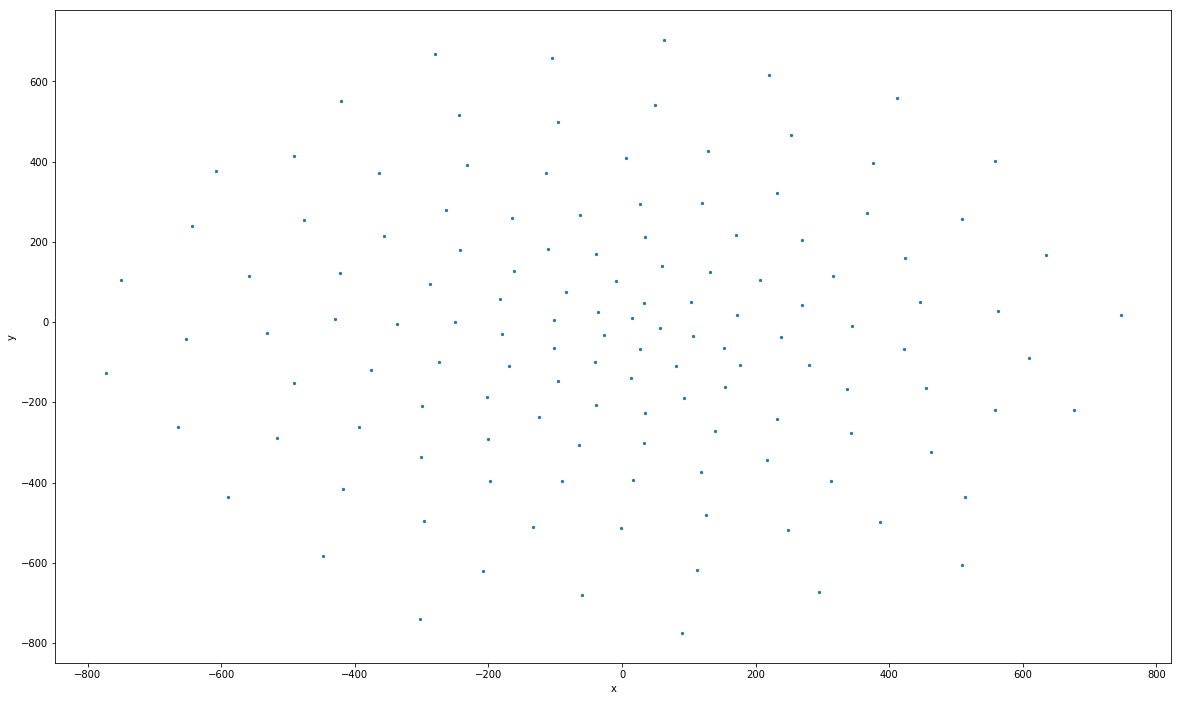

In [26]:
pointsspacy.plot.scatter("x", "y", s=5, figsize=(20, 12))

In [27]:
def plot_region(x_bounds, y_bounds):
    slice = pointsspacy[
        (x_bounds[0] <= pointsspacy.x) &
        (pointsspacy.x <= x_bounds[1]) & 
        (y_bounds[0] <= pointsspacy.y) &
        (pointsspacy.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter(x='x', y='y',  s=35,figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

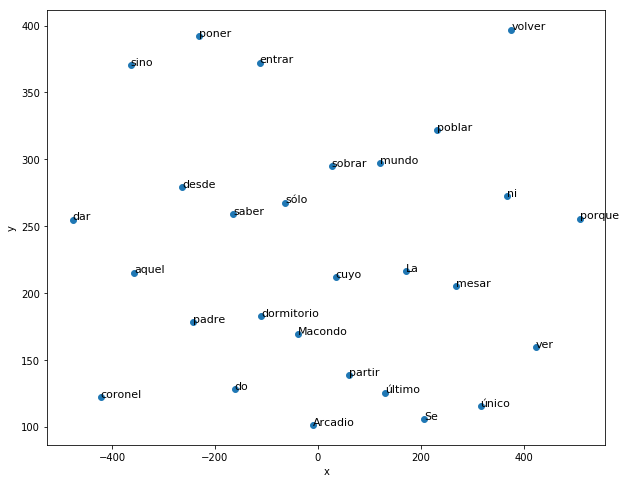

In [28]:
plot_region(x_bounds=(-550, 550), y_bounds=(100, 400))

In [29]:
def clustering(k):
    clusterer = kmeans.KMeansClusterer(k, cosine_distance, avoid_empty_clusters=True)
    clusters = clusterer.cluster(red_matrix, True)
    return clusters

In [43]:
c15 =  clustering(15)
c30 = clustering(30)
c45 = clustering(45)

In [44]:
filename = "trained/cienI_cluster3.pickle"
fileObj = open(filename, 'wb')
pickle.dump(c15, fileObj)
fileObj.close()

In [45]:
filename = "trained/cienI_cluster6.pickle"
fileObj = open(filename, 'wb')
pickle.dump(c30, fileObj)
fileObj.close()

In [46]:
filename = "trained/cienI_cluster45.pickle"
fileObj = open(filename, 'wb')
pickle.dump(c45, fileObj)
fileObj.close()

In [47]:
filename = "trained/cienI_cluster45.pickle"
with open(filename, 'rb') as f:
    clusters = pickle.load(f)

In [48]:
pointscluster = pd.DataFrame(
    [
        (word, coords[0], coords[1], cluster)
        for word, coords, cluster in [
            (word, matrix_dicc2d[key_words[word]], clusters[key_words[word]])
            for word in key_words
        ]
    ],
    columns=["word", "x", "y", "c"]
)

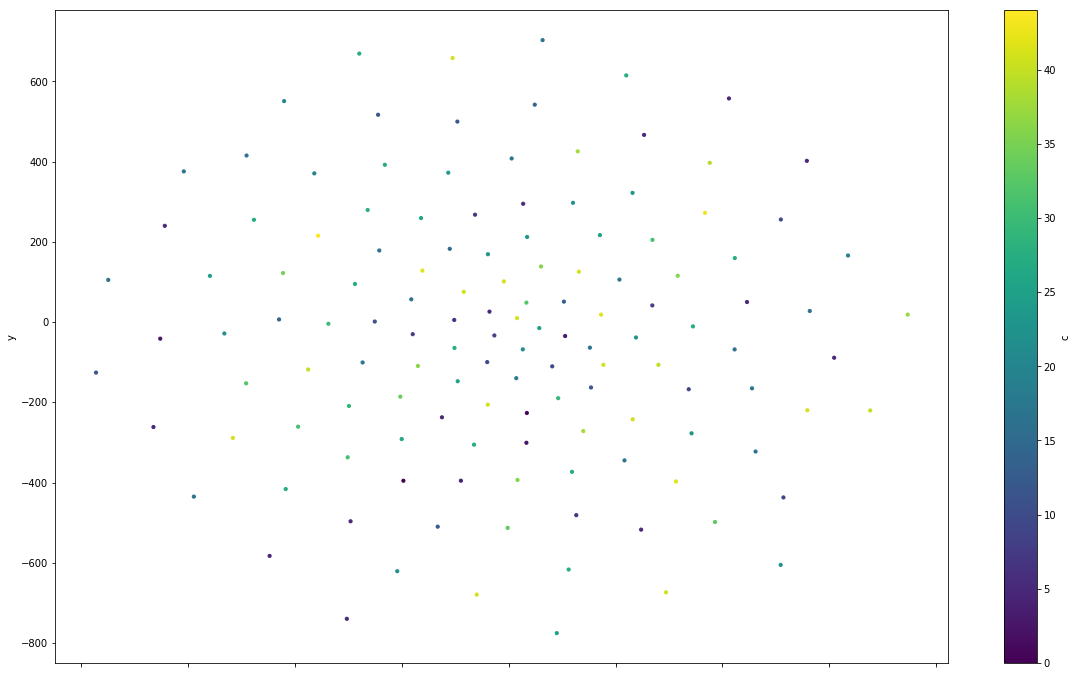

In [49]:
pointscluster.plot.scatter(x='x', y='y', c='c', cmap='viridis', s=10, figsize=(20, 12))

In [50]:
def plot_region_cluster(x_bounds, y_bounds):
    slice = pointscluster[
        (x_bounds[0] <= pointscluster.x) &
        (pointscluster.x <= x_bounds[1]) & 
        (y_bounds[0] <= pointscluster.y) &
        (pointscluster.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter(x='x', y='y', c='c', cmap='viridis', s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

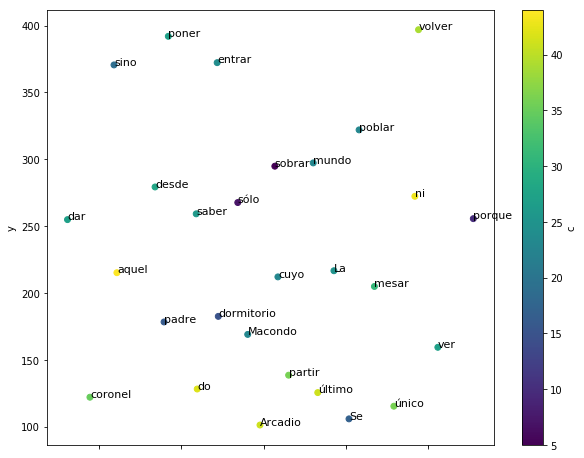

In [51]:
plot_region_cluster(x_bounds=(-550, 550), y_bounds=(100, 400))

In [52]:
# Stopwords
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["de"]]]
print(printer)

['de', 'al', 'en', 'que', 'a', 'y', 'por', 'parir', 'con', 'del', 'sin', 'sobrar', 'hasta', 'En']


In [53]:
# Familia Buendía
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["Buendía"]]]
print(printer)

['Aureliano', 'Buendía', 'mismo', 'José', 'Arcadio', 'Úrsula', 'último', 'cuartar', 'morir', 'Remedios', 'Segundo', 'Fernanda']


In [55]:
# Verbos
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["hacer"]]]
print(printer)

['llevar', 'dar', 'hacer', 'ver', 'tener', 'ir', 'encontrar', 'poner', 'pasar', 'regresar', 'decir', 'quedar']


In [67]:
# Lugares
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["Macondo"]]]
print(printer)

['Macondo', 'mundo', 'cuyo', 'poblar']


**Decidimos crear un nuevo diccionario con diferente palabra de contexto (dos a la derecha y dos a la izquierda) y no utilizar las triplas en este caso**

In [214]:
# Crear diccionario
dicc2 = {}
list_dicc2 = {}
word_id = 0
threshold_w = 50  #se probó con 100 y con 150, 50 fue el que dió mejor resultado
threshold_c = 25 #Se probó con 125 y con 50, siendo 25 el mejor resultado

for word in words:
    w = lemmatize(word.lemma_)
    if not word.is_alpha or str.isdigit(w) or counts[w] < threshold_w:
        continue
    if not w in dicc2:
        features = {}
    else:
        features = dicc2[w]
    
    if not word.i == 0:
        context_izq = doc[word.i - 2]
        c_izq = lemmatize(context_izq.lemma_)
        if context_izq.is_alpha and counts[c_izq] > threshold_c:
            if str.isdigit(c_izq):
                c_izq = "NUM__"
            if not c_izq in features:
                features[c_izq] = 0
            features[c_izq] += 2

    if not word.i < len(doc):
        context_der = doc[word.i + 2]
        c_der = lemmatize(context_der.lemma_)
        if context_der.is_alpha and counts[c_der] > threshold_c:
            if str.isdigit(c_der):
                c_der = "NUM__"
            if not c_der in features:
                features[c_der] = 0
            features[c_der] += 2

    word_id += 2

    dicc2[w] = features

In [215]:
dicc2

{'Márquez': {'y': 2,
  'que': 2,
  'de': 4,
  'coronel': 108,
  'decir': 2,
  'a': 2,
  'Cuando': 2},
 'año': {'de': 68,
  'En': 4,
  'en': 26,
  'cumplir': 12,
  'que': 12,
  'y': 12,
  'su': 18,
  'casi': 18,
  'el': 42,
  'o': 2,
  'hacer': 6,
  'por': 12,
  'unir': 4,
  'durante': 10,
  'apenar': 2,
  'llevar': 4,
  'Macondo': 2,
  'vivir': 2,
  'fin': 2,
  'bordar': 2,
  'hasta': 4,
  'encontrar': 2,
  'do': 2,
  'del': 2,
  'a': 8,
  'casar': 2,
  'decir': 2,
  'estar': 2,
  'todo': 4,
  'año': 2,
  'con': 6,
  'tener': 6,
  'pasar': 2,
  'ser': 2,
  'porque': 2,
  'Arcadio': 2,
  'sino': 2,
  'parir': 2,
  'desde': 2,
  'mesar': 2,
  'menos': 4,
  'cada': 2,
  'allí': 2,
  'conocer': 2,
  'vida': 2,
  'hacia': 2,
  'tardar': 2},
 'de': {'al': 266,
  'Buendía': 14,
  'unir': 1444,
  'veinte': 20,
  'el': 4562,
  'coser': 4,
  'grande': 16,
  'y': 372,
  'sabio': 2,
  'se': 288,
  'ser': 152,
  'pronto': 2,
  'do': 36,
  'cuatro': 16,
  'del': 198,
  'último': 70,
  'cualquiera': 

In [216]:
filename2 = "trained/cien.pickle"
fileObj = open(filename2, 'wb')
pickle.dump(dicc2, fileObj)
fileObj.close()

In [217]:
filename2 = "trained/cien.pickle"
with open(filename2, 'rb') as f:
    dicc2 = pickle.load(f)

In [218]:
features = []
key_words = {}
wid = 0
for d in dicc2:
    if len(d) > 0:
        key_words[d] = wid
        wid += 1
        features.append(dicc2[d])

In [219]:
filename2 = "trained/cien_cleandicc.pickle"
fileObj = open(filename2, 'wb')
pickle.dump(features, fileObj)
fileObj.close()

filename2 = "trained/cien_keys.pickle"
fileObj = open(filename2, 'wb')
pickle.dump(key_words, fileObj)
fileObj.close()

In [220]:
filename2 = "trained/cien_cleandicc.pickle"
with open(filename2, 'rb') as f:
    features = pickle.load(f)
    
filename2 = "trained/cien_keys.pickle"
with open(filename2, 'rb') as f:
    key_words = pickle.load(f)

In [221]:
matrix2 = v.fit_transform(features)

In [222]:
matrix_normed2 = matrix2 / matrix2.max(axis=0)


In [223]:
variances = np.square(matrix_normed2).mean(axis=0) - np.square(matrix_normed2.mean(axis=0))

In [224]:
threshold_v = 0.001
red_matrix2 = np.delete(matrix_normed2, np.where(variances < threshold_v), axis=1)

In [225]:
filename2 = "trained/cien_matrix2.pickle"
fileObj = open(filename2, 'wb')
pickle.dump(red_matrix2, fileObj)
fileObj.close()

In [226]:
filename2 = "trained/cien_matrix2.pickle"
with open(filename2, 'rb') as f:
    red_matrix2 = pickle.load(f)

In [227]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=46)
matrix_dicc2d2 = tsne.fit_transform(red_matrix2)

In [228]:
filename2 = "trained/cien_matrix2d2.pickle"
fileObj = open(filename2, 'wb')
pickle.dump(matrix_dicc2d2, fileObj)
fileObj.close()

In [229]:
filename2 = "trained/cien_matrix2d2.pickle"
with open(filename2, 'rb') as f:
    matrix_dicc2d2 = pickle.load(f)

pointsspacy = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, matrix_dicc2d2[key_words[word]])
            for word in key_words
        ]
    ],
    columns=["word", "x", "y"]
)

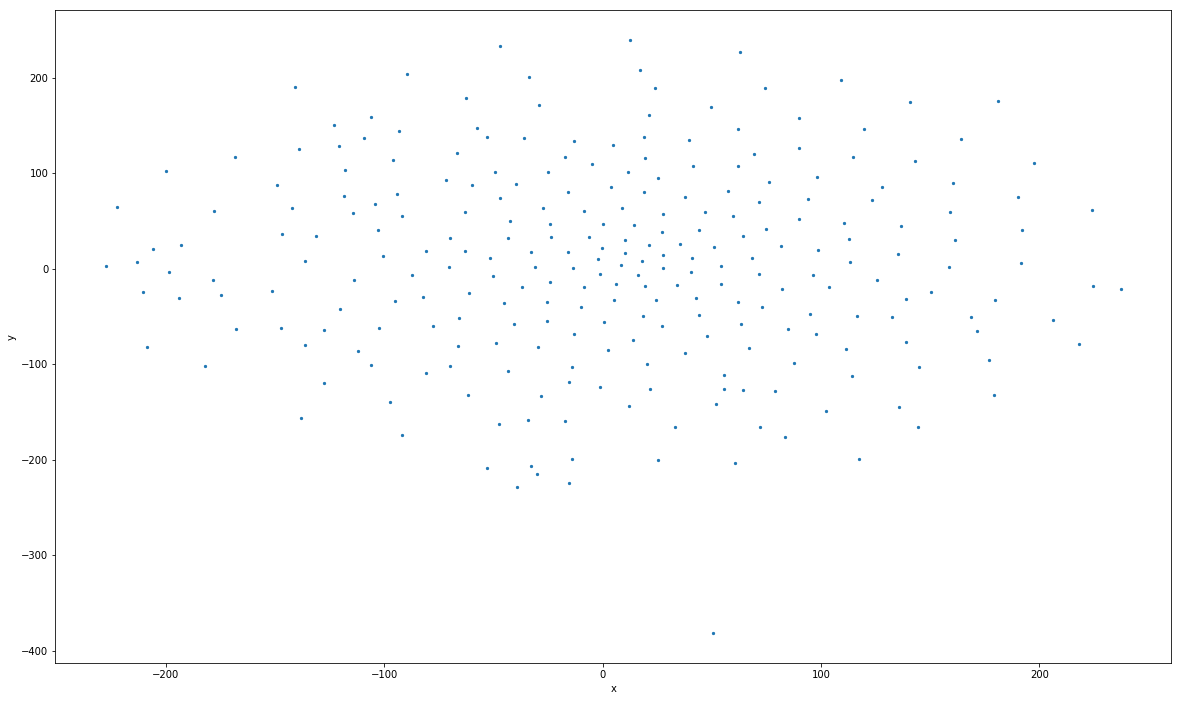

In [230]:
pointsspacy.plot.scatter("x", "y", s=5, figsize=(20, 12))

In [231]:
def clustering(k):
    clusterer = kmeans.KMeansClusterer(k, cosine_distance, avoid_empty_clusters=True)
    clusters2 = clusterer.cluster(red_matrix2, True)
    return clusters2

In [232]:
c15 =  clustering(15)
c30 = clustering(30)
c45 = clustering(45)

In [233]:
filename2 = "trained/cien_cluster15.pickle"
fileObj = open(filename2, 'wb')
pickle.dump(c15, fileObj)
fileObj.close()

In [234]:
filename2 = "trained/cien_cluster30.pickle"
fileObj = open(filename2, 'wb')
pickle.dump(c30, fileObj)
fileObj.close()


In [235]:
filename2 = "trained/cien_cluster45.pickle"
fileObj = open(filename2, 'wb')
pickle.dump(c45, fileObj)
fileObj.close()

In [236]:
filename2 = "trained/cien_cluster45.pickle"
with open(filename2, 'rb') as f:
    clusters = pickle.load(f)

In [237]:
pointscluster = pd.DataFrame(
    [
        (word, coords[0], coords[1], cluster)
        for word, coords, cluster in [
            (word, matrix_dicc2d2[key_words[word]], clusters[key_words[word]])
            for word in key_words
        ]
    ],
    columns=["word", "x", "y", "c"]
)

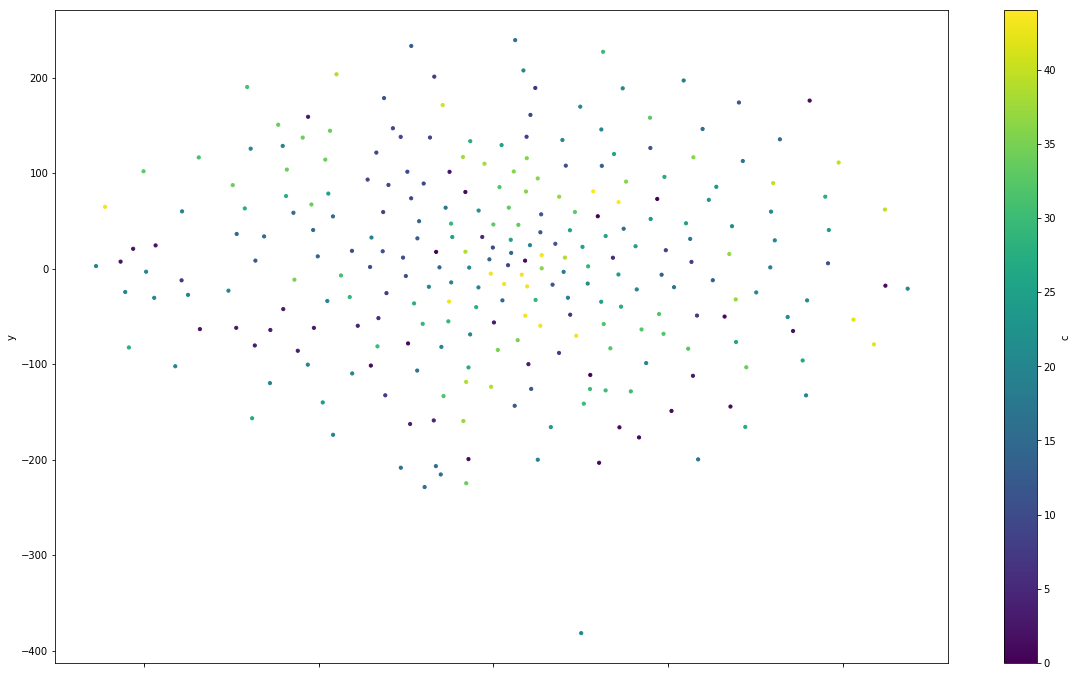

In [238]:
pointscluster.plot.scatter(x='x', y='y', c='c', cmap='viridis', s=10, figsize=(20, 12))

In [239]:
# Stopwords
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["de"]]]
print(printer)

['de', 'después', 'el', 'Aureliano', 'que', 'unir', 'y', 'se', 'por', 'comer', 'parir', 'Un', 'todo', 'lo', 'desde', 'donde', 'más', 'no', 'Úrsula', 'lograr', 'sin', 'poner', 'terminar', 'sobrar', 'hasta', 'A', 'hacia', 'En', 'porque', 'sino', 'sentir', 'nunca', 'amor', 'Una', 'Amaranta']


In [240]:
# verbos
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["ver"]]]
print(printer)

['su', 'ver', 'contra', 'ellos', 'bien']


In [241]:
# ?
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["Buendía"]]]
print(printer)

['Márquez', 'Buendía', 'Segundo']


In [242]:
# ?
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["Aureliano"]]]
print(printer)

['de', 'después', 'el', 'Aureliano', 'que', 'unir', 'y', 'se', 'por', 'comer', 'parir', 'Un', 'todo', 'lo', 'desde', 'donde', 'más', 'no', 'Úrsula', 'lograr', 'sin', 'poner', 'terminar', 'sobrar', 'hasta', 'A', 'hacia', 'En', 'porque', 'sino', 'sentir', 'nunca', 'amor', 'Una', 'Amaranta']
